# Подготовка данных

In [1]:
%matplotlib inline
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# df = pd.read_csv(r"InternationalBifurca_DATA_2023-10-30_0629.csv", sep=',')
df = pd.read_csv(r"InternationalBifurca_DATA_2025-04-20_0932.csv", sep=',')

/var/folders/2x/tx689lxn54ngmttr2b89rvg00000gn/T/ipykernel_58577/3738330455.py:2: DtypeWarning: Columns (264) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"InternationalBifurca_DATA_2025-04-20_0932.csv", sep=',')


In [3]:
df = df.dropna(subset=['sex'])
df

,record_id,identifier,date,adhoc_pci,sex,age,weight,height,clinical_presentation,time_from_mi_symptoms_onse,...,time_to_death_f5,time_to_acs_f5,time_to_stroke_f5,time_to_pci_f5,time_to_cabg_f5,hospitalization_f5,bleeding_f5,angio_follow_f5,restenosis_f5,side_branch_restenosis_5
0,MNRI0001,MNRI-2018-0001,2018-02-01,1.0,2.0,77.0,84.0,165.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MNRI0002,MNRI-2018-0002,2018-01-24,0.0,1.0,68.0,81.0,171.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MNRI0003,MNRI-2018-0003,2018-01-24,0.0,1.0,62.0,74.0,180.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MNRI0004,MNRI-2018-0004,2018-01-30,1.0,1.0,67.0,84.0,167.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MNRI0005,MNRI-2018-0005,2018-01-30,0.0,1.0,57.0,103.0,174.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,TRCH-2019-0026,2019-03-11,1.0,1.0,67.0,90.0,174.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2140,TRCH0027,TRCH-2019-0027,2019-03-18,1.0,1.0,69.0,60.0,174.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2141,TRCH0028,TRCH-2019-0028,2019-03-19,0.0,2.0,81.0,50.0,160.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2142,TRCH0029,TRCH-2019-0029,2019-03-28,1.0,1.0,86.0,74.0,170.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
anyInf = df[df == np.inf].sum()
anyInf[anyInf != 0]

stent_distal_vessel_size    inf
sb_stent_sb_diametr         inf
dtype: object

In [5]:
patient_info_cols = ['record_id', 'date', 'sex', 'age', 'adhoc_pci', 'weight', 'height', 
                     'clinical_presentation', 'time_from_mi_symptoms_onse', 
                     'ccs_class', 'diabet', 'insulin_diabetes', 'hypertension', 'smoking', 
                     'dyslipidemia', 'anemia', 'atrial_fibrilation', 'oac_use', 'valvular_disease', 
                     'valvular_disease_was_previ', 'if_yes_what_type___1', 'if_yes_what_type___2', 
                     'if_yes_what_type___3', 'if_yes_what_type___4', 'if_yes_what_type___5', 
                     'if_yes_what_type___6', 'if_yes_what_type___7', 'ef', 'creatinine', 'ckd', 
                     'mi_history', 'cerebrovascular_disease', 'previously_treated_cerebro', 'previous_stroke_tia', 
                     'peripheral_artery_disease', 'previously_treated_periphe', 'copd', 'history_of_cancer', 
                     'previous_pci', 'previous_cabg']

intervention_cols = ['single_vessel', 'trifurcation', 'bifurcation_location', 
                  'lesion_ivolves', 'angle', 'calcium', 'trombosis', 
                  'total_trobotic_occlusion', 'restenosis_reocclusion', 'cto_bifurc', 
                  'medina_proximal', 'medina_distal', 'medina_side', 'mb_length_proximal', 
                  'sb_length', 'proximal_diametr', 'distal_diametr', 'side_diametr', 'stenosis_proximal', 
                  'stenosis_distal', 'timi_flow_main_branch', 'side_stenosis', 'timi_flow_side_branch', 
                  'major_lm', 'major_non_lm', 'minor_criteria', 'main_branch_rvd', 'def', 'def_2']

operation_cols = ['side_protection', 'main_predilatation', 'side_predilat', 
                  'stent_was_implated_from_lm', 'stent_number', 'stent_number_bif', 'stent_technique', 
                  'first_stent_impanted', 'provisional_2_stent_techni', 'stent_direction', 'defered_stenting', 
                  'stent_diameter', 'stent_length', 'stent_type___1', 'stent_type___2', 'stent_type___3', 
                  'stent_type___4', 'stent_type___5', 'stent_type___6', 'stent_type___7', 'stent_type___9', 
                  'stent_type___8', 'dstent2', 'stent_length2', 'stent_distal_vessel_size', 
                  'sb_stent_side_branch_diametr', 'sb_stent_sb_diametr', 'twostent_technique', 
                  'sb_dilatation', 'stent_postdilatation', 'proximal_optimization', 'pot', 
                  'pot_balloon_diametr', 'kissing_post', 'modified_kis', 'several_kissing']

new_cols = ['adverse_event_followup_f2_v2', 'angio_follow_f5', 'antiplatalet_drug_was_chan',
            'attempt_to_dilate_stenting', 'ballooon_size_for_postdila', 'complete_revascularisation',
            'currently_on_dialysis', 'followup_1_year_do_not_complete_if_2nd_bifurcation_complete',
            'identifier', 'ishemia_test___1', 'ishemia_test___2', 'ishemia_test___3', 'ishemia_test___4',
            'kissing_post_2stent___1', 'kissing_post_2stent___2', 'left_main_stent_direction',
            'main_branch_calcification', 'mb_stenosis_f2', 'medina_side_branch_2', 'myocardial_ischemia',
            'myocardial_ishemia_was_det', 'number_of_kissing', 'number_of_kissing_2',
            'other_lesions_in_main_bran', 'other_lesions_in_side_brach',
            'patient_information_do_not_complete_if_2nd_bifurca_complete', 'pot_2', 'pot_balloon_diametr_2',
            'pot_balloon_length', 'pot_balloon_length_2', 'pressure2', 'reson_for_change_stopped___1',
            'reson_for_change_stopped___2', 'reson_for_change_stopped___3', 'restenosis_f5', 'sb_length_2',
            'sb_stenosis_f2', 'side_branch_calcification_2', 'side_branch_restenosis',
            'side_branch_restenosis_3', 'side_branch_restenosis_5', 'stent_pressure', 'stent_type_2___1',
            'stent_type_2___2', 'stent_type_2___3', 'stent_type_2___4', 'stent_type_2___5', 'stent_type_2___6',
            'stent_type_2___7', 'stent_type_2___8', 'stent_type_2___9', 'thrombolysis', 'uncross_strategy___1',
            'uncross_strategy___2', 'uncross_strategy___3', 'uncross_strategy___4', 'uncross_strategy___5',
            'uncross_strategy___6', 'uncross_strategy___7', 'uncross_strategy___8', 'uncross_strategy___9']

In [6]:
non_vascular_deaths = ['MNRI1054', 'MNRI1191', 'MNRI1351', 'MNRI1352', 'MNRI1473', 'MNRI1670', 'MNRI0637', 'MNRI0656', 'MNRI0751', 'MNRI0758',
                      'MNRI0805', 'MNRI0818', 'MNRI1054', 'MNRI0087', 'MNRI1191', 'MNRI0108', 'MNRI0307', 'MNRI0215', 'MNRI0322', 'MNRI0293',
                      'MNRI0156', 'MNRI0215', 'MNRI0488', 'MNRI0612', 'MNRI0708', 'MNRI0767', 'MNRI0772', 'MNRI0786', 'MNRI1105', 'MNRI1186',
                      'MNRI1462', 'MNRI1633']

In [7]:
df = df[~df['record_id'].isin(non_vascular_deaths)]

In [8]:
df

,record_id,identifier,date,adhoc_pci,sex,age,weight,height,clinical_presentation,time_from_mi_symptoms_onse,...,time_to_death_f5,time_to_acs_f5,time_to_stroke_f5,time_to_pci_f5,time_to_cabg_f5,hospitalization_f5,bleeding_f5,angio_follow_f5,restenosis_f5,side_branch_restenosis_5
0,MNRI0001,MNRI-2018-0001,2018-02-01,1.0,2.0,77.0,84.0,165.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MNRI0002,MNRI-2018-0002,2018-01-24,0.0,1.0,68.0,81.0,171.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MNRI0003,MNRI-2018-0003,2018-01-24,0.0,1.0,62.0,74.0,180.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MNRI0004,MNRI-2018-0004,2018-01-30,1.0,1.0,67.0,84.0,167.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MNRI0005,MNRI-2018-0005,2018-01-30,0.0,1.0,57.0,103.0,174.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,TRCH-2019-0026,2019-03-11,1.0,1.0,67.0,90.0,174.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2140,TRCH0027,TRCH-2019-0027,2019-03-18,1.0,1.0,69.0,60.0,174.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2141,TRCH0028,TRCH-2019-0028,2019-03-19,0.0,2.0,81.0,50.0,160.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2142,TRCH0029,TRCH-2019-0029,2019-03-28,1.0,1.0,86.0,74.0,170.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
patient_present_cols = patient_info_cols + intervention_cols + operation_cols + new_cols
patient_present_df = pd.DataFrame({col_name: df[col_name] for col_name in patient_present_cols})

In [10]:
patient_present_df

,record_id,date,sex,age,adhoc_pci,weight,height,clinical_presentation,time_from_mi_symptoms_onse,ccs_class,...,thrombolysis,uncross_strategy___1,uncross_strategy___2,uncross_strategy___3,uncross_strategy___4,uncross_strategy___5,uncross_strategy___6,uncross_strategy___7,uncross_strategy___8,uncross_strategy___9
0,MNRI0001,2018-02-01,2.0,77.0,1.0,84.0,165.0,5.0,4.0,NaN,...,0.0,0,0,0,0,0,0,0,0,0
1,MNRI0002,2018-01-24,1.0,68.0,0.0,81.0,171.0,1.0,NaN,1.0,...,NaN,0,0,0,0,0,0,0,0,0
2,MNRI0003,2018-01-24,1.0,62.0,0.0,74.0,180.0,4.0,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,0
3,MNRI0004,2018-01-30,1.0,67.0,1.0,84.0,167.0,2.0,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,0
4,MNRI0005,2018-01-30,1.0,57.0,0.0,103.0,174.0,1.0,NaN,2.0,...,NaN,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,2019-03-11,1.0,67.0,1.0,90.0,174.0,2.0,NaN,NaN,...,0.0,0,0,0,0,0,0,0,0,0
2140,TRCH0027,2019-03-18,1.0,69.0,1.0,60.0,174.0,3.0,1.0,NaN,...,1.0,0,0,0,0,0,0,0,0,0
2141,TRCH0028,2019-03-19,2.0,81.0,0.0,50.0,160.0,2.0,NaN,NaN,...,0.0,0,0,0,0,0,0,0,0,0
2142,TRCH0029,2019-03-28,1.0,86.0,1.0,74.0,170.0,3.0,1.0,NaN,...,0.0,0,0,0,0,0,0,0,0,0


In [11]:
columns_to_preserve = ['valvular_disease', 'previous_stroke_tia', 'twostent_technique']

def remove_columns_with_nan_threshold(df, threshold=250):
    nan_counts = df.isnull().sum()
    
    columns_to_drop = [col for col in nan_counts[nan_counts > threshold].index 
                      if col not in columns_to_preserve]
    
    print(columns_to_drop)
    
    df_dropped = df.drop(columns=columns_to_drop)
    
    return df_dropped

In [12]:
patient_present_df = remove_columns_with_nan_threshold(patient_present_df, 500)

['time_from_mi_symptoms_onse', 'ccs_class', 'insulin_diabetes', 'valvular_disease_was_previ', 'previously_treated_cerebro', 'previously_treated_periphe', 'lesion_ivolves', 'total_trobotic_occlusion', 'sb_length', 'timi_flow_main_branch', 'timi_flow_side_branch', 'stent_was_implated_from_lm', 'first_stent_impanted', 'provisional_2_stent_techni', 'dstent2', 'stent_length2', 'sb_stent_side_branch_diametr', 'proximal_optimization', 'pot', 'pot_balloon_diametr', 'several_kissing', 'adverse_event_followup_f2_v2', 'angio_follow_f5', 'antiplatalet_drug_was_chan', 'attempt_to_dilate_stenting', 'ballooon_size_for_postdila', 'complete_revascularisation', 'left_main_stent_direction', 'main_branch_calcification', 'mb_stenosis_f2', 'medina_side_branch_2', 'myocardial_ischemia', 'myocardial_ishemia_was_det', 'number_of_kissing', 'number_of_kissing_2', 'other_lesions_in_main_bran', 'other_lesions_in_side_brach', 'pot_2', 'pot_balloon_diametr_2', 'pot_balloon_length', 'pot_balloon_length_2', 'pressure2

In [13]:
# patient_present_df = patient_present_df.drop(['record_id', 'date'], axis = 1)
patient_present_df = patient_present_df.drop(['date'], axis = 1)
patient_present_df

,record_id,sex,age,adhoc_pci,weight,height,clinical_presentation,diabet,hypertension,smoking,...,stent_type_2___9,uncross_strategy___1,uncross_strategy___2,uncross_strategy___3,uncross_strategy___4,uncross_strategy___5,uncross_strategy___6,uncross_strategy___7,uncross_strategy___8,uncross_strategy___9
0,MNRI0001,2.0,77.0,1.0,84.0,165.0,5.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,MNRI0002,1.0,68.0,0.0,81.0,171.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,MNRI0003,1.0,62.0,0.0,74.0,180.0,4.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,MNRI0004,1.0,67.0,1.0,84.0,167.0,2.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,MNRI0005,1.0,57.0,0.0,103.0,174.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,1.0,67.0,1.0,90.0,174.0,2.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2140,TRCH0027,1.0,69.0,1.0,60.0,174.0,3.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2141,TRCH0028,2.0,81.0,0.0,50.0,160.0,2.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2142,TRCH0029,1.0,86.0,1.0,74.0,170.0,3.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
patient_present_df.replace(to_replace = [np.inf, -np.inf], value= None, inplace=True)

In [15]:
cols_to_drop = patient_present_df.columns[patient_present_df.nunique() <= 1]
patient_present_df = patient_present_df.drop(cols_to_drop, axis=1)
patient_present_df

,record_id,sex,age,adhoc_pci,weight,height,clinical_presentation,diabet,hypertension,smoking,...,stent_type_2___5,stent_type_2___6,stent_type_2___7,stent_type_2___8,uncross_strategy___1,uncross_strategy___2,uncross_strategy___3,uncross_strategy___4,uncross_strategy___8,uncross_strategy___9
0,MNRI0001,2.0,77.0,1.0,84.0,165.0,5.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,MNRI0002,1.0,68.0,0.0,81.0,171.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,MNRI0003,1.0,62.0,0.0,74.0,180.0,4.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,MNRI0004,1.0,67.0,1.0,84.0,167.0,2.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,MNRI0005,1.0,57.0,0.0,103.0,174.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,1.0,67.0,1.0,90.0,174.0,2.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2140,TRCH0027,1.0,69.0,1.0,60.0,174.0,3.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2141,TRCH0028,2.0,81.0,0.0,50.0,160.0,2.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2142,TRCH0029,1.0,86.0,1.0,74.0,170.0,3.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
numerical = ['age', 'weight', 'height', 'ef', 'creatinine', 'ckd', 'angle', 'mb_length_proximal', 
            'proximal_diametr', 'distal_diametr', 'side_diametr', 'stenosis_proximal', 
            'stenosis_distal', 'side_stenosis', 'minor_criteria', 'main_branch_rvd', 
            'stent_diameter', 'stent_length', 'stent_distal_vessel_size', 'sb_stent_sb_diametr',
            'ballooon_size_for_postdila', 
            'left_main_stent_direction',
            'mb_stenosis_f2',
            'myocardial_ischemia',
            'number_of_kissing_2',
            'pot_balloon_diametr_2',
            'pot_balloon_length',
            'pot_balloon_length_2',
            'pressure2',
            'sb_length_2',
            'sb_stenosis_f2',
            'stent_pressure']

categorical = ['sex', 'clinical_presentation', 'bifurcation_location', 'stent_number', 
              'stent_number_bif', 'stent_technique', 'stent_direction']

binary = ['diabet', 'adhoc_pci', 'hypertension', 'smoking', 'dyslipidemia', 'anemia', 
         'atrial_fibrilation', 'oac_use', 'if_yes_what_type___1', 'if_yes_what_type___2',
         'if_yes_what_type___3', 'if_yes_what_type___4', 'if_yes_what_type___6', 
         'mi_history', 'cerebrovascular_disease', 'peripheral_artery_disease', 'copd', 
         'history_of_cancer', 'previous_pci', 'previous_cabg', 'single_vessel', 'trifurcation',
         'calcium', 'trombosis', 'restenosis_reocclusion', 'cto_bifurc', 
         'medina_proximal', 'medina_distal', 'medina_side', 'major_lm', 'major_non_lm',
         'def', 'def_2', 'side_protection', 'main_predilatation', 'side_predilat',
         'defered_stenting', 'stent_type___1', 'stent_type___2', 'stent_type___3', 'stent_type___4',
         'stent_type___5', 'stent_type___6', 'stent_type___7', 'stent_type___9', 'stent_type___8', 
         'sb_dilatation', 'stent_postdilatation', 'kissing_post', 'modified_kis',
         'currently_on_dialysis',
         'ishemia_test___1',
         'ishemia_test___2',
         'ishemia_test___3',
         'kissing_post_2stent___1',
         'kissing_post_2stent___2',
         'reson_for_change_stopped___1',
         'reson_for_change_stopped___2',
         'reson_for_change_stopped___3',
         'stent_type_2___1',
         'stent_type_2___3',
         'stent_type_2___4',
         'stent_type_2___5',
         'stent_type_2___6',
         'stent_type_2___7',
         'stent_type_2___8',
         'uncross_strategy___1',
         'uncross_strategy___2',
         'uncross_strategy___3',
         'uncross_strategy___4',
         'uncross_strategy___8',
         'uncross_strategy___9']

In [17]:
without_second_bif = df
adverse_events = without_second_bif['event_type_followup_f2___1'] \
| without_second_bif['event_type_followup_f2___2'] \
| without_second_bif['event_type_followup_f2_v2___1'] \
| without_second_bif['event_type_followup_f2_v2___2']
print(sum(adverse_events))
print(len(adverse_events))

158
2044


In [18]:
combined = zip(without_second_bif['event_type_followup_f2___1'],  
               without_second_bif['event_type_followup_f2___2'] * 2,
               without_second_bif['event_type_followup_f2_v2___1'] * 3, 
               without_second_bif['event_type_followup_f2_v2___2'] * 4)

combined_adverse_events = np.array([max(t) for t in combined])

In [19]:
unique, counts = np.unique(combined_adverse_events, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)

{0: 1886, 1: 53, 2: 18, 3: 51, 4: 36}


In [20]:
id_col = patient_present_df['record_id']
patient_present_df = patient_present_df.drop(['record_id', 'identifier'], axis=1)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(patient_present_df, combined_adverse_events, test_size=0.4, stratify=combined_adverse_events, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test, random_state=42)

In [22]:
y_train[y_train != 0] = 1
y_test[y_test != 0] = 1
y_val[y_val != 0] = 1

In [23]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

imputer_categorical = SimpleImputer(strategy='most_frequent')
X_train[categorical + binary] = imputer_categorical.fit_transform(X_train[categorical + binary])
X_test[categorical + binary] = imputer_categorical.transform(X_test[categorical + binary])
X_val[categorical + binary] = imputer_categorical.transform(X_val[categorical + binary])

imputer = IterativeImputer(random_state=0)
columns = list(X_train.columns)
X_train = pd.DataFrame(data = imputer.fit_transform(X_train), columns = columns)
X_test = pd.DataFrame(data = imputer.transform(X_test), columns = columns)
X_val = pd.DataFrame(data = imputer.transform(X_val), columns = columns)

X_train

,sex,age,adhoc_pci,weight,height,clinical_presentation,diabet,hypertension,smoking,dyslipidemia,...,stent_type_2___5,stent_type_2___6,stent_type_2___7,stent_type_2___8,uncross_strategy___1,uncross_strategy___2,uncross_strategy___3,uncross_strategy___4,uncross_strategy___8,uncross_strategy___9
0,1.0,41.0,0.0,100.000000,177.000000,5.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,56.0,1.0,81.000000,172.000000,4.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,55.0,1.0,87.535524,172.093993,3.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,79.0,0.0,61.000000,160.000000,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,61.0,1.0,84.000000,179.000000,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,2.0,69.0,0.0,111.000000,159.000000,1.0,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1222,1.0,57.0,0.0,96.000000,178.000000,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1223,1.0,63.0,0.0,80.000000,162.000000,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1224,1.0,75.0,0.0,165.000000,71.000000,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
X_train_with_ID = X_train.copy()

In [25]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
df_for_ohe = pd.concat([X_train[categorical], X_test[categorical], X_val[categorical]], ignore_index=True)
ohe.fit(df_for_ohe)

OneHotEncoder(sparse_output=False)

In [26]:
def process_ohe(dataframe, cat_cols, encoder):
    encoded_columns = pd.DataFrame(encoder.transform(dataframe[cat_cols]))

    encoded_columns.columns = encoder.get_feature_names_out(cat_cols)

    dataframe = pd.concat([dataframe, encoded_columns], axis=1)

    dataframe.drop(cat_cols, axis=1, inplace=True)

    return dataframe

In [27]:
# X_train = process_ohe(X_train, categorical, ohe)
# X_test = process_ohe(X_test, categorical, ohe)
# X_val = process_ohe(X_val, categorical, ohe)
# X_train

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

feature_selector = SelectKBest(f_classif, k=40)
X_feature_selection = feature_selector.fit_transform(X_train, y_train)
X_feature_selection.shape

strong_cols = []

feature_scores = feature_selector.scores_
features = X_train.columns
features_scores_sorted = sorted(zip(features, feature_scores), key=lambda x: x[1], reverse=True)
for col in features_scores_sorted[:30]:
    strong_cols.append(col[0])

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [84] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [29]:
X_train = X_train[strong_cols]
X_test = X_test[strong_cols]
X_val = X_val[strong_cols]
X_train

,age,anemia,ef,cerebrovascular_disease,ckd,peripheral_artery_disease,if_yes_what_type___1,creatinine,single_vessel,calcium,...,adhoc_pci,previous_pci,cto_bifurc,valvular_disease,side_diametr,major_lm,mi_history,trifurcation,dyslipidemia,smoking
0,41.0,0.0,49.0,0.0,91.130343,0.0,0.0,90.0,0.0,0.0,...,0.0,1.0,0.0,0.000000,2.4,0.0,1.0,0.0,0.0,0.0
1,56.0,0.0,68.0,0.0,83.132035,0.0,0.0,89.0,1.0,0.0,...,1.0,1.0,0.0,0.000000,3.0,0.0,1.0,0.0,0.0,0.0
2,55.0,0.0,70.0,0.0,78.364633,0.0,0.0,94.0,1.0,0.0,...,1.0,0.0,0.0,0.000000,2.4,0.0,0.0,0.0,1.0,0.0
3,79.0,0.0,73.0,1.0,64.542788,0.0,0.0,96.0,0.0,1.0,...,0.0,0.0,0.0,0.000000,3.1,0.0,0.0,0.0,0.0,0.0
4,61.0,0.0,62.0,0.0,87.329657,0.0,0.0,83.0,0.0,0.0,...,1.0,0.0,0.0,0.000000,2.5,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,69.0,0.0,60.0,0.0,69.608441,0.0,0.0,97.0,1.0,0.0,...,0.0,1.0,0.0,-0.048430,2.7,0.0,0.0,0.0,0.0,0.0
1222,57.0,0.0,39.0,0.0,53.707072,0.0,0.0,127.0,0.0,0.0,...,0.0,0.0,0.0,0.005881,2.4,0.0,0.0,1.0,0.0,0.0
1223,63.0,1.0,71.0,0.0,86.111321,0.0,0.0,83.0,1.0,0.0,...,0.0,1.0,0.0,0.000000,2.2,0.0,0.0,0.0,0.0,0.0
1224,75.0,0.0,69.0,1.0,68.979615,1.0,0.0,93.0,1.0,0.0,...,0.0,1.0,0.0,0.000000,2.4,0.0,0.0,0.0,1.0,1.0


In [30]:
corr_matrix = X_train.corr().abs()

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

threshold = 0.4

to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

to_drop

['ckd',
 'creatinine',
 'side_stenosis',
 'minor_criteria',
 'adhoc_pci',
 'valvular_disease',
 'major_lm',
 'mi_history']

In [31]:
X_train = X_train.drop(columns=to_drop)
X_test = X_test.drop(columns=to_drop)
X_val = X_val.drop(columns=to_drop)

X_train

,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,medina_side,...,def,history_of_cancer,previous_stroke_tia,clinical_presentation,previous_pci,cto_bifurc,side_diametr,trifurcation,dyslipidemia,smoking
0,41.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.477395,5.0,1.0,0.0,2.4,0.0,0.0,0.0
1,56.0,0.0,68.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.313995,4.0,1.0,0.0,3.0,0.0,0.0,0.0
2,55.0,0.0,70.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.478905,3.0,0.0,0.0,2.4,0.0,1.0,0.0
3,79.0,0.0,73.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.000000,1.0,0.0,0.0,3.1,0.0,0.0,0.0
4,61.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.448962,2.0,0.0,0.0,2.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,69.0,0.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.525775,1.0,1.0,0.0,2.7,0.0,0.0,0.0
1222,57.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.616766,1.0,0.0,0.0,2.4,1.0,0.0,0.0
1223,63.0,1.0,71.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.429977,1.0,1.0,0.0,2.2,0.0,0.0,0.0
1224,75.0,0.0,69.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.000000,1.0,1.0,0.0,2.4,0.0,1.0,1.0


In [32]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(1226, 22)
(409, 22)
(409, 22)


In [33]:
print(X_train.columns)

Index(['age', 'anemia', 'ef', 'cerebrovascular_disease',
       'peripheral_artery_disease', 'if_yes_what_type___1', 'single_vessel',
       'calcium', 'stent_type___3', 'medina_side', 'atrial_fibrilation',
       'height', 'def', 'history_of_cancer', 'previous_stroke_tia',
       'clinical_presentation', 'previous_pci', 'cto_bifurc', 'side_diametr',
       'trifurcation', 'dyslipidemia', 'smoking'],
      dtype='object')


# Syntentic data

In [34]:
X_train_with_ID = X_train.copy().reset_index(drop=False)
X_train_with_ID

,index,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,...,def,history_of_cancer,previous_stroke_tia,clinical_presentation,previous_pci,cto_bifurc,side_diametr,trifurcation,dyslipidemia,smoking
0,0,41.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.477395,5.0,1.0,0.0,2.4,0.0,0.0,0.0
1,1,56.0,0.0,68.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.313995,4.0,1.0,0.0,3.0,0.0,0.0,0.0
2,2,55.0,0.0,70.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.478905,3.0,0.0,0.0,2.4,0.0,1.0,0.0
3,3,79.0,0.0,73.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.000000,1.0,0.0,0.0,3.1,0.0,0.0,0.0
4,4,61.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.448962,2.0,0.0,0.0,2.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,1221,69.0,0.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.525775,1.0,1.0,0.0,2.7,0.0,0.0,0.0
1222,1222,57.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.616766,1.0,0.0,0.0,2.4,1.0,0.0,0.0
1223,1223,63.0,1.0,71.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.429977,1.0,1.0,0.0,2.2,0.0,0.0,0.0
1224,1224,75.0,0.0,69.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.000000,1.0,1.0,0.0,2.4,0.0,1.0,1.0


In [35]:
X_train_with_ID_and_target = X_train_with_ID.copy()
X_train_with_ID_and_target['target'] = y_train
X_train_with_ID_and_target

,index,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,...,history_of_cancer,previous_stroke_tia,clinical_presentation,previous_pci,cto_bifurc,side_diametr,trifurcation,dyslipidemia,smoking,target
0,0,41.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.477395,5.0,1.0,0.0,2.4,0.0,0.0,0.0,0
1,1,56.0,0.0,68.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.313995,4.0,1.0,0.0,3.0,0.0,0.0,0.0,0
2,2,55.0,0.0,70.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.478905,3.0,0.0,0.0,2.4,0.0,1.0,0.0,0
3,3,79.0,0.0,73.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.000000,1.0,0.0,0.0,3.1,0.0,0.0,0.0,0
4,4,61.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.448962,2.0,0.0,0.0,2.5,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,1221,69.0,0.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.525775,1.0,1.0,0.0,2.7,0.0,0.0,0.0,1
1222,1222,57.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.616766,1.0,0.0,0.0,2.4,1.0,0.0,0.0,0
1223,1223,63.0,1.0,71.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.429977,1.0,1.0,0.0,2.2,0.0,0.0,0.0,0
1224,1224,75.0,0.0,69.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.000000,1.0,1.0,0.0,2.4,0.0,1.0,1.0,0


In [36]:
from sdv.metadata import Metadata

metadata = Metadata.detect_from_dataframe(data=X_train_with_ID_and_target)

In [37]:
from sdv.single_table import GaussianCopulaSynthesizer, CTGANSynthesizer, TVAESynthesizer, CopulaGANSynthesizer

# synthesizer = GaussianCopulaSynthesizer(metadata, default_distribution='norm')
synthesizer = CTGANSynthesizer(metadata, epochs=500)
# synthesizer = TVAESynthesizer(metadata, epochs=500)
# synthesizer = CopulaGANSynthesizer(metadata, epochs=500, default_distribution='norm')
synthesizer.fit(X_train_with_ID_and_target)

synthetic_data = synthesizer.sample(num_rows=10000)
synthetic_data

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sdv/single_table/base.py:104: UserWarning:

We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.



,index,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,...,history_of_cancer,previous_stroke_tia,clinical_presentation,previous_pci,cto_bifurc,side_diametr,trifurcation,dyslipidemia,smoking,target
0,12053904,70.0,0.0,59.149562,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.447572,2.0,0.0,0.0,2.19,0.0,0.0,1.0,0
1,13010658,49.0,0.0,44.247410,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.197412,1.0,1.0,0.0,2.79,0.0,0.0,0.0,0
2,9912584,66.0,0.0,71.998898,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.549007,1.0,1.0,1.0,2.49,0.0,1.0,0.0,0
3,2797363,93.0,1.0,28.874420,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.225474,2.0,1.0,0.0,2.31,0.0,0.0,0.0,0
4,13661511,85.0,1.0,52.591785,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.811912,1.0,1.0,0.0,2.77,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4519439,76.0,0.0,19.661519,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.216220,1.0,1.0,0.0,3.23,0.0,1.0,0.0,0
9996,657099,39.0,0.0,17.000000,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.483891,1.0,0.0,0.0,3.18,0.0,0.0,0.0,0
9997,3822342,62.0,0.0,56.890679,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.222976,1.0,1.0,0.0,2.86,1.0,0.0,0.0,0
9998,2301487,67.0,1.0,63.502722,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.537988,1.0,0.0,1.0,4.73,0.0,1.0,1.0,1


In [38]:
unique, counts = np.unique(synthetic_data['target'], return_counts=True)
value_counts = dict(zip(unique, counts))
value_counts

{0: 9047, 1: 953}

In [39]:
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
minority_synthetic_data

,index,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,...,history_of_cancer,previous_stroke_tia,clinical_presentation,previous_pci,cto_bifurc,side_diametr,trifurcation,dyslipidemia,smoking,target
21,2160786,67.0,1.0,50.014005,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.282830,3.0,1.0,0.0,4.60,0.0,0.0,0.0,1
24,14581378,68.0,0.0,17.000000,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.283295,1.0,1.0,0.0,1.32,0.0,0.0,0.0,1
30,15998352,33.0,0.0,52.169243,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.248009,1.0,1.0,0.0,2.53,0.0,0.0,0.0,1
46,9724348,79.0,0.0,76.907187,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.476200,1.0,1.0,0.0,2.57,0.0,0.0,0.0,1
53,11316388,56.0,0.0,48.080214,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.263232,1.0,0.0,0.0,2.01,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9947,1081656,74.0,0.0,47.898453,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.204095,3.0,0.0,0.0,2.53,0.0,0.0,0.0,1
9949,8610861,65.0,0.0,66.751177,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.535373,5.0,1.0,0.0,2.37,0.0,0.0,0.0,1
9964,12348922,78.0,1.0,74.148507,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.171623,1.0,1.0,0.0,2.39,0.0,1.0,0.0,1
9978,1830277,55.0,0.0,54.513859,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.316144,1.0,1.0,0.0,3.09,0.0,0.0,0.0,1


In [40]:
syntetic_minority_dropped = minority_synthetic_data.copy().drop(['target', 'index'], axis=1)
syntetic_minority_dropped

,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,medina_side,...,def,history_of_cancer,previous_stroke_tia,clinical_presentation,previous_pci,cto_bifurc,side_diametr,trifurcation,dyslipidemia,smoking
21,67.0,1.0,50.014005,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.282830,3.0,1.0,0.0,4.60,0.0,0.0,0.0
24,68.0,0.0,17.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.283295,1.0,1.0,0.0,1.32,0.0,0.0,0.0
30,33.0,0.0,52.169243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.248009,1.0,1.0,0.0,2.53,0.0,0.0,0.0
46,79.0,0.0,76.907187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.476200,1.0,1.0,0.0,2.57,0.0,0.0,0.0
53,56.0,0.0,48.080214,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.263232,1.0,0.0,0.0,2.01,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9947,74.0,0.0,47.898453,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.204095,3.0,0.0,0.0,2.53,0.0,0.0,0.0
9949,65.0,0.0,66.751177,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.535373,5.0,1.0,0.0,2.37,0.0,0.0,0.0
9964,78.0,1.0,74.148507,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.171623,1.0,1.0,0.0,2.39,0.0,1.0,0.0
9978,55.0,0.0,54.513859,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.316144,1.0,1.0,0.0,3.09,0.0,0.0,0.0


In [41]:
syntetic_target = minority_synthetic_data['target']
syntetic_target

21      1
24      1
30      1
46      1
53      1
       ..
9947    1
9949    1
9964    1
9978    1
9998    1
Name: target, Length: 953, dtype: int64

In [42]:
X_train_new = pd.concat([X_train, syntetic_minority_dropped])
X_train_new

,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,medina_side,...,def,history_of_cancer,previous_stroke_tia,clinical_presentation,previous_pci,cto_bifurc,side_diametr,trifurcation,dyslipidemia,smoking
0,41.0,0.0,49.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.477395,5.0,1.0,0.0,2.40,0.0,0.0,0.0
1,56.0,0.0,68.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.313995,4.0,1.0,0.0,3.00,0.0,0.0,0.0
2,55.0,0.0,70.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.478905,3.0,0.0,0.0,2.40,0.0,1.0,0.0
3,79.0,0.0,73.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.000000,1.0,0.0,0.0,3.10,0.0,0.0,0.0
4,61.0,0.0,62.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.448962,2.0,0.0,0.0,2.50,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9947,74.0,0.0,47.898453,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.204095,3.0,0.0,0.0,2.53,0.0,0.0,0.0
9949,65.0,0.0,66.751177,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.535373,5.0,1.0,0.0,2.37,0.0,0.0,0.0
9964,78.0,1.0,74.148507,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.171623,1.0,1.0,0.0,2.39,0.0,1.0,0.0
9978,55.0,0.0,54.513859,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.316144,1.0,1.0,0.0,3.09,0.0,0.0,0.0


In [43]:
y_train_new = np.concatenate((y_train, syntetic_target))
y_train_new

array([0, 0, 0, ..., 1, 1, 1])

# Оптимизация TabPFN на auc-roc для 10 фолдов

In [44]:
from sklearn.preprocessing import StandardScaler

scaller = StandardScaler()
scaller.fit(X_train)

StandardScaler()

In [45]:
import joblib

joblib.dump(scaller, "./scaler.save")

['./scaler.save']

In [46]:
X_train_folds = pd.concat([X_train, X_val])
y_train_k_fold = np.concatenate((y_train, y_val), axis=0)

In [47]:
scaled_features = scaller.transform(X_train_folds)

In [48]:
train_df = pd.DataFrame(data=scaled_features, columns=X_train_folds.columns)
train_df

,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,medina_side,...,def,history_of_cancer,previous_stroke_tia,clinical_presentation,previous_pci,cto_bifurc,side_diametr,trifurcation,dyslipidemia,smoking
0,-2.317888,-0.228824,-0.659638,-0.379021,-0.288165,-0.155651,-0.926054,-0.517531,1.297194,-0.708838,...,-0.075779,-0.232745,0.162955,2.292618,1.163257,-0.286501,-0.417415,-0.212564,-0.825685,-0.516264
1,-0.791826,-0.228824,1.121135,-0.379021,-0.288165,-0.155651,1.079851,-0.517531,-0.770894,1.410760,...,-0.075779,4.296547,-0.730225,1.534186,1.163257,-0.286501,0.684941,-0.212564,-0.825685,-0.516264
2,-0.893563,-0.228824,1.308584,-0.379021,-0.288165,-0.155651,1.079851,-0.517531,-0.770894,-0.708838,...,-0.075779,-0.232745,0.171210,0.775754,-0.859655,-0.286501,-0.417415,-0.212564,1.211116,-0.516264
3,1.548135,-0.228824,1.589759,2.638378,-0.288165,-0.155651,-0.926054,1.932250,-0.770894,-0.708838,...,-0.075779,-0.232745,-2.446583,-0.741111,-0.859655,-0.286501,0.868667,-0.212564,-0.825685,-0.516264
4,-0.283139,-0.228824,0.558786,-0.379021,-0.288165,-0.155651,-0.926054,-0.517531,-0.770894,-0.708838,...,-0.075779,4.296547,0.007535,0.017321,-0.859655,-0.286501,-0.233689,-0.212564,-0.825685,-0.516264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630,-0.690089,-0.228824,0.465061,-0.379021,-0.288165,-0.155651,1.079851,-0.517531,-0.770894,1.410760,...,-0.075779,-0.232745,0.080058,-0.741111,1.163257,-0.286501,-0.766494,4.704474,1.211116,-0.516264
1631,1.649873,4.370167,-0.940812,-0.379021,-0.288165,-0.155651,-0.926054,1.932250,1.297194,-0.708838,...,-0.075779,-0.232745,1.474545,2.292618,1.163257,-0.286501,1.971022,-0.212564,-0.825685,-0.516264
1632,0.429023,-0.228824,0.652510,-0.379021,-0.288165,-0.155651,-0.926054,1.932250,-0.770894,-0.708838,...,-0.075779,4.296547,-0.326126,-0.741111,1.163257,-0.286501,0.133763,-0.212564,-0.825685,-0.516264
1633,-0.283139,-0.228824,0.090161,-0.379021,-0.288165,6.424629,1.079851,1.932250,-0.770894,1.410760,...,-0.075779,-0.232745,-0.335178,0.017321,1.163257,-0.286501,0.133763,-0.212564,-0.825685,-0.516264


In [49]:
# X_train_new = scaller.transform(X_train_new)

In [50]:
from tabpfn import TabPFNClassifier
import pickle
from tabpfn_extensions.post_hoc_ensembles.sklearn_interface import AutoTabPFNClassifier

In [52]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import torch  # Required for saving the model
from tabpfn import TabPFNClassifier
import os
import pickle
import json

def objective(X_train_folds, y_train_k_fold):
    best_score = -np.inf
    roc_auc_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    accuracy_scores = []
    
    kf = StratifiedKFold(n_splits=10)
    for train_index, test_index in kf.split(X_train_folds, y_train_k_fold):
        # Get train and test data for this fold
        X_train_fold = X_train_folds.iloc[train_index] if hasattr(X_train_folds, 'iloc') else X_train_folds[train_index]
        X_test_fold = X_train_folds.iloc[test_index] if hasattr(X_train_folds, 'iloc') else X_train_folds[test_index]
        y_train = y_train_k_fold[train_index]
        y_test = y_train_k_fold[test_index]
        
        # Apply StandardScaler to training data only, then transform test data
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train_fold)
        X_test = scaler.transform(X_test_fold)

        # Initialize TabPFN classifier
        classifier = AutoTabPFNClassifier(device='auto', max_time=60)
        
        # Fit classifier
        classifier.fit(X_train, y_train)
        
        # Predict probabilities and classes
        y_pred_prob = classifier.predict_proba(X_test)[:, 1]
        y_pred = classifier.predict(X_test)
        
        # Calculate metrics
        roc_auc = roc_auc_score(y_test, y_pred_prob)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        
        roc_auc_scores.append(roc_auc)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        accuracy_scores.append(accuracy)
        
        if roc_auc > best_score:
            best_score = roc_auc
    
    # Create a dictionary with all the metrics
    results = {
        "roc_auc": {
            "scores": [float(score) for score in roc_auc_scores],
            "mean": float(np.mean(roc_auc_scores))
        },
        "f1": {
            "scores": [float(score) for score in f1_scores],
            "mean": float(np.mean(f1_scores))
        },
        "precision": {
            "scores": [float(score) for score in precision_scores],
            "mean": float(np.mean(precision_scores))
        },
        "recall": {
            "scores": [float(score) for score in recall_scores],
            "mean": float(np.mean(recall_scores))
        },
        "accuracy": {
            "scores": [float(score) for score in accuracy_scores],
            "mean": float(np.mean(accuracy_scores))
        }
    }
    
    # Save metrics results to JSON file
    with open('scores_AutoTabFPN_CV.json', 'w') as json_file:
        json.dump(results, json_file, indent=4)

    # Save the model
    with open('AutoTabFPN_CV.pkl', 'wb') as f:
        pickle.dump(classifier, f)
    
    print("Model and evaluation metrics saved to JSON and pickle files.")
    
    return {'loss': -np.mean(roc_auc_scores), 'best_score': best_score}

result = objective(X_train_folds, y_train_k_fold)

print("Results:", result)

2025-05-22 12:10:02 INFO     Using `default` preset for Post Hoc Ensemble.
2025-05-22 12:10:02 INFO     No categorical_feature_indices given. Assuming no categorical features.
/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

2025-05-22 12:10:02 INFO     Using task type: TaskType.BINARY
2025-05-22 12:10:02 INFO     Obtaining TabPFN models from a random portfolio.
2025-05-22 12:10:04 INFO     Using 100 base models: ['default_tabpfn_model_0', 'random_tabpfn_model_1', 'random_rf_pfn_model_2', 'random_rf_pfn_model_3', 'random_rf_pfn_model_4', 'random_rf_pfn_model_5', 'random_tabpfn_model_6', 'random_tabpfn_model_7', 'random_rf_pfn_model_8', 'random_t

Model and evaluation metrics saved to JSON and pickle files.
Results: {'loss': -0.6873664459161148, 'best_score': 0.8084988962472406}


/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



2025-05-22 12:58:05 INFO     Using `default` preset for Post Hoc Ensemble.
2025-05-22 12:58:05 INFO     No categorical_feature_indices given. Assuming no categorical features.
/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

2025-05-22 12:58:05 INFO     Using task type: TaskType.BINARY
2025-05-22 12:58:05 INFO     Obtaining TabPFN models from a random portfolio.
2025-05-22 12:58:08 INFO     Using 100 base models: ['default_tabpfn_model_0', 'random_tabpfn_model_1', 'random_rf_pfn_model_2', 'random_rf_pfn_model_3', 'random_rf_pfn_model_4', 'random_rf_pfn_model_5', 'random_tabpfn_model_6', 'random_tabpfn_model_7', 'random_rf_pfn_model_8', 'random_t

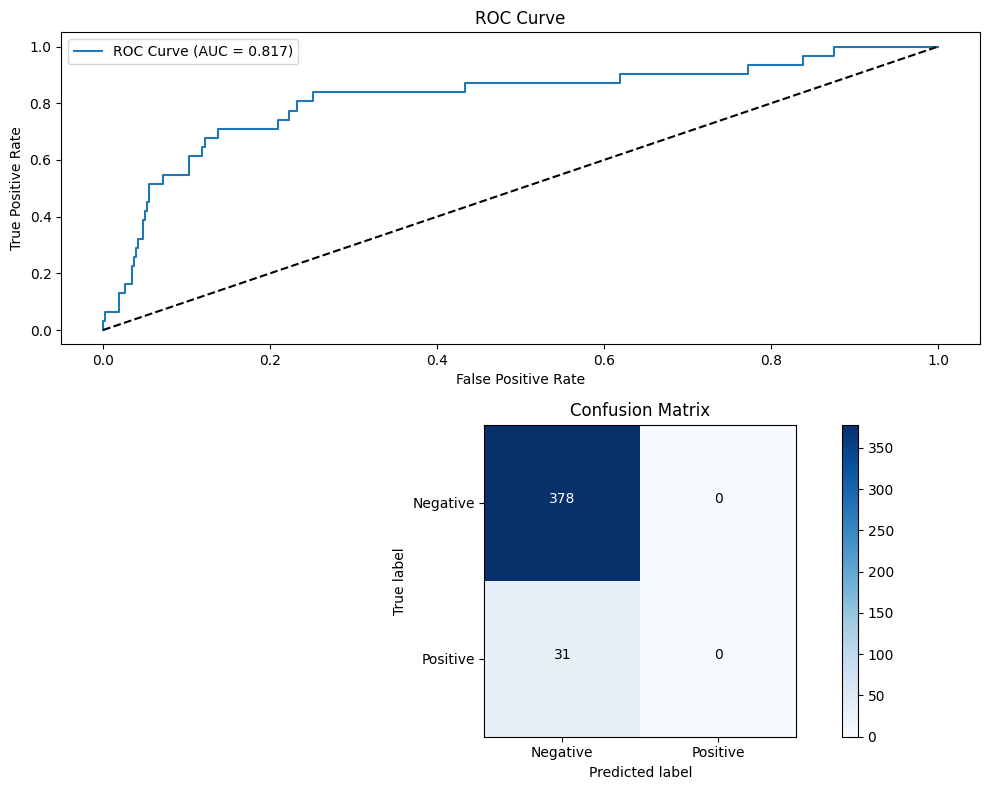

Test metrics saved to tabpfn_final_test_results_20250522_130030.json
Visualization saved to tabpfn_final_test_results_20250522_130030.png
Test metrics:
  roc_auc: 0.8169
  f1: 0.0000
  precision: 0.0000
  recall: 0.0000
  accuracy: 0.9242


In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, roc_curve
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json
from datetime import datetime

# Apply StandardScaler to the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_folds)

# Apply the same transformation to test data
X_test_scaled = scaler.transform(X_test)

# Initialize and train final TabPFN classifier on the full training data
final_classifier = AutoTabPFNClassifier(device='auto', max_time=60)
final_classifier.fit(X_train_scaled, y_train_k_fold)

# Save the final model
with open('AutoTabFPN_final_model.pkl', 'wb') as f:
    pickle.dump(final_classifier, f)

# Make predictions on test data
y_pred_prob = final_classifier.predict_proba(X_test_scaled)[:, 1]
y_pred = final_classifier.predict(X_test_scaled)

# Calculate metrics
metrics = {
    "roc_auc": float(roc_auc_score(y_test, y_pred_prob)),
    "f1": float(f1_score(y_test, y_pred)),
    "precision": float(precision_score(y_test, y_pred)),
    "recall": float(recall_score(y_test, y_pred)),
    "accuracy": float(accuracy_score(y_test, y_pred))
}

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Save results to JSON
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
result_filename = f'tabpfn_final_test_results_{timestamp}.json'

with open(result_filename, 'w') as f:
    json.dump(metrics, f, indent=4)

# Visualizations
plt.figure(figsize=(10, 8))

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.subplot(2, 1, 1)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {metrics["roc_auc"]:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Plot confusion matrix
plt.subplot(2, 1, 2)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])

# Add text annotations to confusion matrix
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Save the figure
plt.savefig(f'tabpfn_final_test_results_{timestamp}.png')
plt.show()

# Print metrics summary
print(f"Test metrics saved to {result_filename}")
print(f"Visualization saved to tabpfn_final_test_results_{timestamp}.png")
print("Test metrics:")
for metric, value in metrics.items():
    print(f"  {metric}: {value:.4f}")

# TABPFN + edge cases

In [55]:
import importlib
import edge_case
importlib.reload(edge_case)
from edge_case import generate_edge_cases

edge_cases = generate_edge_cases(num_samples=150)
edge_cases


,age,height,clinical_presentation,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,medina_side,...,restenosis_reocclusion,adhoc_pci,main_predilatation,stent_diameter,stent_length,mortality,smoking,dyslipidemia,anemia,atrial_fibrilation
0,85.166695,158.513893,5,17.383818,1,1,0,1,1,1,...,1,1,0,2.725508,37.844611,1,1,1,1,1
1,95.963835,168.368143,4,24.838871,1,1,1,1,1,1,...,1,1,1,2.465256,29.799415,1,1,1,1,1
2,88.509236,151.994317,4,19.705380,1,1,1,1,1,1,...,1,1,1,2.457795,36.585190,1,0,1,1,1
3,92.807009,160.203405,5,15.757748,0,1,0,1,1,1,...,1,1,1,2.309615,34.232300,1,1,1,1,1
4,96.239502,164.039686,5,21.961974,1,1,1,1,1,1,...,1,0,1,2.660538,30.051020,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,99.510905,166.976362,4,25.370961,1,0,1,1,1,1,...,1,1,1,2.554469,29.944907,1,1,1,1,1
146,95.281470,143.160827,5,21.892076,1,1,1,1,0,1,...,1,1,0,2.626765,28.857971,1,1,1,1,1
147,96.440095,154.721375,5,20.963266,1,1,1,1,1,1,...,1,0,1,2.371528,28.248528,1,1,1,1,1
148,96.731001,160.466720,5,19.938365,1,1,1,1,1,1,...,1,1,1,2.020478,34.580807,1,1,1,1,1


In [56]:
edge_case_cols = set(edge_cases.columns)
x_train_cols = set(X_train.columns)

common_cols = edge_case_cols.intersection(x_train_cols)
only_in_edge_cases = edge_case_cols - x_train_cols
only_in_x_train = x_train_cols - edge_case_cols

print(f"COMPARISON OF COLUMNS:")
print(f"\nTotal columns in edge_cases: {len(edge_case_cols)}")
print(f"Total columns in X_train: {len(x_train_cols)}")
print(f"Number of common columns: {len(common_cols)}")

print("\n--- COMMON COLUMNS ---")
for col in sorted(common_cols):
    print(f"- {col}")

print("\n--- COLUMNS ONLY IN EDGE CASES ---")
for col in sorted(only_in_edge_cases):
    print(f"- {col}")

print("\n--- COLUMNS ONLY IN X_TRAIN ---")
for col in sorted(only_in_x_train):
    print(f"- {col}")

COMPARISON OF COLUMNS:

Total columns in edge_cases: 30
Total columns in X_train: 22
Number of common columns: 22

--- COMMON COLUMNS ---
- age
- anemia
- atrial_fibrilation
- calcium
- cerebrovascular_disease
- clinical_presentation
- cto_bifurc
- def
- dyslipidemia
- ef
- height
- history_of_cancer
- if_yes_what_type___1
- medina_side
- peripheral_artery_disease
- previous_pci
- previous_stroke_tia
- side_diametr
- single_vessel
- smoking
- stent_type___3
- trifurcation

--- COLUMNS ONLY IN EDGE CASES ---
- adhoc_pci
- main_predilatation
- mortality
- restenosis_reocclusion
- stent_diameter
- stent_length
- stent_type___4
- stent_type___5

--- COLUMNS ONLY IN X_TRAIN ---


In [57]:
edge_cases_target = edge_cases['mortality']
edge_cases_features = edge_cases.copy().drop('mortality', axis=1)

In [58]:
edge_cases_features_names = [feature for feature in edge_cases.columns if feature in X_train.columns]
edge_cases_features = pd.DataFrame(edge_cases, columns=edge_cases_features_names)
edge_cases_features

,age,height,clinical_presentation,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,medina_side,...,def,history_of_cancer,previous_pci,previous_stroke_tia,side_diametr,stent_type___3,smoking,dyslipidemia,anemia,atrial_fibrilation
0,85.166695,158.513893,5,17.383818,1,1,0,1,1,1,...,1,1,1,1,1.205518,0,1,1,1,1
1,95.963835,168.368143,4,24.838871,1,1,1,1,1,1,...,1,0,1,1,1.761979,1,1,1,1,1
2,88.509236,151.994317,4,19.705380,1,1,1,1,1,1,...,1,0,1,0,1.021064,0,0,1,1,1
3,92.807009,160.203405,5,15.757748,0,1,0,1,1,1,...,1,1,1,0,1.078804,0,1,1,1,1
4,96.239502,164.039686,5,21.961974,1,1,1,1,1,1,...,1,0,1,0,1.385241,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,99.510905,166.976362,4,25.370961,1,0,1,1,1,1,...,0,0,1,1,1.109599,0,1,1,1,1
146,95.281470,143.160827,5,21.892076,1,1,1,1,0,1,...,1,0,1,0,1.921698,0,1,1,1,1
147,96.440095,154.721375,5,20.963266,1,1,1,1,1,1,...,1,1,1,0,1.012680,0,1,1,1,1
148,96.731001,160.466720,5,19.938365,1,1,1,1,1,1,...,1,1,1,1,1.241588,0,1,1,1,1


In [59]:
X_train_folds = pd.concat([X_train, X_val, edge_cases_features])
y_train_k_fold = np.concatenate((y_train, y_val, edge_cases_target), axis=0)

In [60]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import torch  # Required for saving the model
from tabpfn import TabPFNClassifier
import os
import pickle
import json

def objective(X_train_folds, y_train_k_fold):
    best_score = -np.inf
    roc_auc_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    accuracy_scores = []
    
    kf = StratifiedKFold(n_splits=10)
    for train_index, test_index in kf.split(X_train_folds, y_train_k_fold):
        # Get train and test data for this fold
        X_train_fold = X_train_folds.iloc[train_index] if hasattr(X_train_folds, 'iloc') else X_train_folds[train_index]
        X_test_fold = X_train_folds.iloc[test_index] if hasattr(X_train_folds, 'iloc') else X_train_folds[test_index]
        y_train = y_train_k_fold[train_index]
        y_test = y_train_k_fold[test_index]
        
        # Apply StandardScaler to training data only, then transform test data
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train_fold)
        X_test = scaler.transform(X_test_fold)

        # Initialize TabPFN classifier
        classifier = AutoTabPFNClassifier(device='auto', max_time=60)
        
        # Fit classifier
        classifier.fit(X_train, y_train)
        
        # Predict probabilities and classes
        y_pred_prob = classifier.predict_proba(X_test)[:, 1]
        y_pred = classifier.predict(X_test)
        
        # Calculate metrics
        roc_auc = roc_auc_score(y_test, y_pred_prob)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        
        roc_auc_scores.append(roc_auc)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        accuracy_scores.append(accuracy)
        
        if roc_auc > best_score:
            best_score = roc_auc
    
    # Create a dictionary with all the metrics
    results = {
        "roc_auc": {
            "scores": [float(score) for score in roc_auc_scores],
            "mean": float(np.mean(roc_auc_scores))
        },
        "f1": {
            "scores": [float(score) for score in f1_scores],
            "mean": float(np.mean(f1_scores))
        },
        "precision": {
            "scores": [float(score) for score in precision_scores],
            "mean": float(np.mean(precision_scores))
        },
        "recall": {
            "scores": [float(score) for score in recall_scores],
            "mean": float(np.mean(recall_scores))
        },
        "accuracy": {
            "scores": [float(score) for score in accuracy_scores],
            "mean": float(np.mean(accuracy_scores))
        }
    }
    
    # Save metrics results to JSON file
    with open('scores_AutoTabFPN_CV_edge_cases.json', 'w') as json_file:
        json.dump(results, json_file, indent=4)

    # Save the model
    with open('AutoTabFPN_CV_edge_cases.pkl', 'wb') as f:
        pickle.dump(classifier, f)
    
    print("Model and evaluation metrics saved to JSON and pickle files.")
    
    return {'loss': -np.mean(roc_auc_scores), 'best_score': best_score}

result = objective(X_train_folds, y_train_k_fold)

print("Results:", result)

2025-05-22 15:10:20 INFO     Using `default` preset for Post Hoc Ensemble.
2025-05-22 15:10:20 INFO     No categorical_feature_indices given. Assuming no categorical features.
/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

2025-05-22 15:10:20 INFO     Using task type: TaskType.BINARY
2025-05-22 15:10:20 INFO     Obtaining TabPFN models from a random portfolio.
2025-05-22 15:10:22 INFO     Using 100 base models: ['default_tabpfn_model_0', 'random_tabpfn_model_1', 'random_rf_pfn_model_2', 'random_rf_pfn_model_3', 'random_rf_pfn_model_4', 'random_rf_pfn_model_5', 'random_tabpfn_model_6', 'random_tabpfn_model_7', 'random_rf_pfn_model_8', 'random_t

Model and evaluation metrics saved to JSON and pickle files.
Results: {'loss': -0.8595027856617261, 'best_score': 1.0}


2025-05-22 15:49:50 INFO     Using `default` preset for Post Hoc Ensemble.
2025-05-22 15:49:50 INFO     No categorical_feature_indices given. Assuming no categorical features.
/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

2025-05-22 15:49:50 INFO     Using task type: TaskType.BINARY
2025-05-22 15:49:50 INFO     Obtaining TabPFN models from a random portfolio.
2025-05-22 15:49:52 INFO     Using 100 base models: ['default_tabpfn_model_0', 'random_tabpfn_model_1', 'random_rf_pfn_model_2', 'random_rf_pfn_model_3', 'random_rf_pfn_model_4', 'random_rf_pfn_model_5', 'random_tabpfn_model_6', 'random_tabpfn_model_7', 'random_rf_pfn_model_8', 'random_t

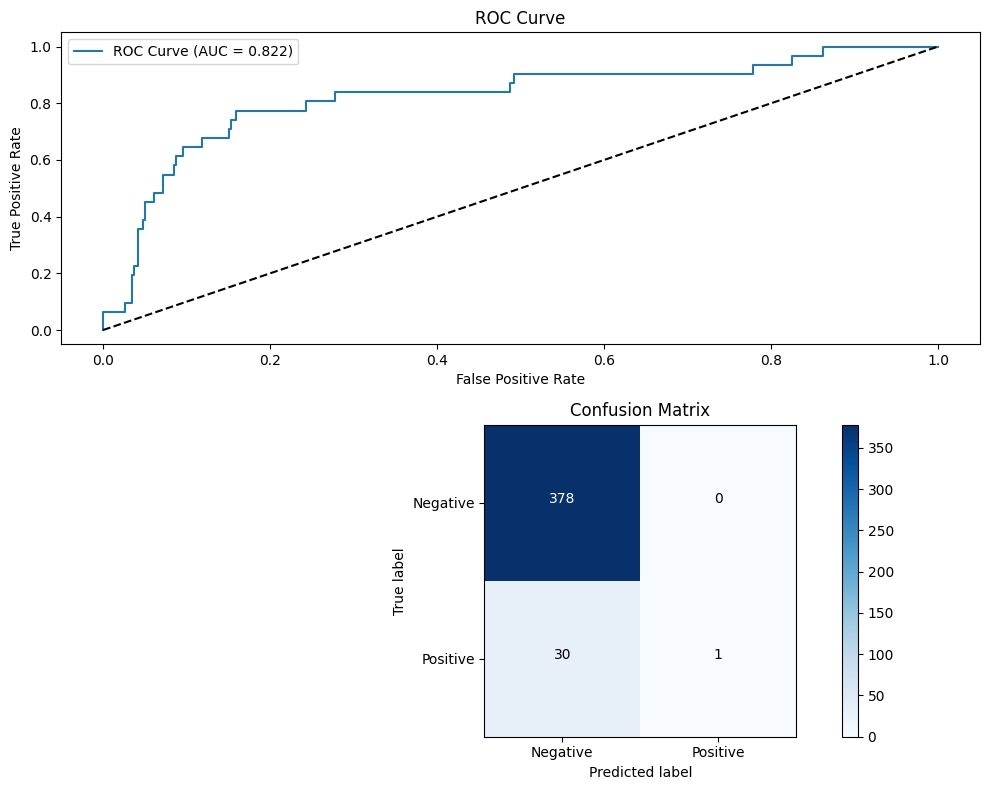

Test metrics saved to tabpfn_final_test_results_20250522_155223.json
Visualization saved to tabpfn_final_test_results_20250522_155223.png
Test metrics:
  roc_auc: 0.8225
  f1: 0.0625
  precision: 1.0000
  recall: 0.0323
  accuracy: 0.9267


In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, roc_curve
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json
from datetime import datetime

# Apply StandardScaler to the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_folds)

# Apply the same transformation to test data
X_test_scaled = scaler.transform(X_test)

# Initialize and train final TabPFN classifier on the full training data
final_classifier = AutoTabPFNClassifier(device='auto', max_time=60)
final_classifier.fit(X_train_scaled, y_train_k_fold)

# Save the final model
with open('AutoTabFPN_final_model_edge_cases.pkl', 'wb') as f:
    pickle.dump(final_classifier, f)

# Make predictions on test data
y_pred_prob = final_classifier.predict_proba(X_test_scaled)[:, 1]
y_pred = final_classifier.predict(X_test_scaled)

# Calculate metrics
metrics = {
    "roc_auc": float(roc_auc_score(y_test, y_pred_prob)),
    "f1": float(f1_score(y_test, y_pred)),
    "precision": float(precision_score(y_test, y_pred)),
    "recall": float(recall_score(y_test, y_pred)),
    "accuracy": float(accuracy_score(y_test, y_pred))
}

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Save results to JSON
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
result_filename = f'tabpfn_final_test_results_{timestamp}.json'

with open(result_filename, 'w') as f:
    json.dump(metrics, f, indent=4)

# Visualizations
plt.figure(figsize=(10, 8))

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.subplot(2, 1, 1)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {metrics["roc_auc"]:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Plot confusion matrix
plt.subplot(2, 1, 2)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])

# Add text annotations to confusion matrix
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Save the figure
plt.savefig(f'tabpfn_final_test_results_{timestamp}.png')
plt.show()

# Print metrics summary
print(f"Test metrics saved to {result_filename}")
print(f"Visualization saved to tabpfn_final_test_results_{timestamp}.png")
print("Test metrics:")
for metric, value in metrics.items():
    print(f"  {metric}: {value:.4f}")

# TABFPN + edge cases + synthetic

In [62]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import torch  # Required for saving the model
from tabpfn import TabPFNClassifier
import os
import pickle
import json
import pandas as pd
import sys
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Import synthcity components
import synthcity.logger as log
from synthcity.plugins import Plugins
from synthcity.plugins.core.dataloader import GenericDataLoader

log.add(sink=sys.stderr, level="INFO")

class AutoTabPFNClassifier(TabPFNClassifier):
    def __init__(self, device='auto', max_time=60, **kwargs):
        super().__init__(device=device, **kwargs)
        self.max_time = max_time

def objective(X_train_folds, y_train_k_fold):
    best_score = -np.inf
    roc_auc_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    accuracy_scores = []
    
    # Initialize scaler for consistent transformations
    scaler = StandardScaler()
    X_train_folds_scaled = scaler.fit_transform(X_train_folds)
    
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(X_train_folds, y_train_k_fold):
        # Get original train and test data for this fold
        not_scaled_X_train = X_train_folds.iloc[train_index] if hasattr(X_train_folds, 'iloc') else pd.DataFrame(X_train_folds[train_index])
        X_test_fold = X_train_folds_scaled[test_index]
        y_train = y_train_k_fold[train_index]
        y_test = y_train_k_fold[test_index]
        
        # Prepare train data with target for synthetic generation
        train_df = not_scaled_X_train.copy().reset_index(drop=True)
        train_df['target'] = y_train
        
        # Create GenericDataLoader as per documentation
        loader = GenericDataLoader(
            train_df,
            target_column="target",
        )
        
        # Generate synthetic data using synthcity's ARF
        syn_model = Plugins().get("arf")
        syn_model.fit(loader)
        
        # Generate synthetic samples
        synthetic_data = syn_model.generate(count=10000).dataframe()
        
        # Extract minority class samples
        minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
        if len(minority_synthetic_data) > 600:
            minority_synthetic_data = minority_synthetic_data.sample(n=600)
        
        # Drop target column from synthetic data
        syntetic_minority_features = minority_synthetic_data.drop('target', axis=1)
        syntetic_target = minority_synthetic_data['target']

        # Combine original and synthetic data
        X_train_combined = pd.concat([not_scaled_X_train, syntetic_minority_features])
        X_train = scaler.transform(X_train_combined)
        y_train_combined = np.concatenate((y_train, syntetic_target.values), axis=0)

        # Initialize TabPFN classifier
        classifier = AutoTabPFNClassifier(device='auto', max_time=60)
        
        # Fit classifier
        classifier.fit(X_train, y_train_combined)
        
        # Predict probabilities and classes
        y_pred_prob = classifier.predict_proba(X_test_fold)[:, 1]
        y_pred = classifier.predict(X_test_fold)
        
        # Calculate metrics
        roc_auc = roc_auc_score(y_test, y_pred_prob)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        
        roc_auc_scores.append(roc_auc)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        accuracy_scores.append(accuracy)
        
        if roc_auc > best_score:
            best_score = roc_auc
            best_classifier = classifier
    
    # Create a dictionary with all the metrics
    results = {
        "roc_auc": {
            "scores": [float(score) for score in roc_auc_scores],
            "mean": float(np.mean(roc_auc_scores))
        },
        "f1": {
            "scores": [float(score) for score in f1_scores],
            "mean": float(np.mean(f1_scores))
        },
        "precision": {
            "scores": [float(score) for score in precision_scores],
            "mean": float(np.mean(precision_scores))
        },
        "recall": {
            "scores": [float(score) for score in recall_scores],
            "mean": float(np.mean(recall_scores))
        },
        "accuracy": {
            "scores": [float(score) for score in accuracy_scores],
            "mean": float(np.mean(accuracy_scores))
        }
    }
    
    # Save metrics results to JSON file
    with open('scores_AutoTabFPN_ARF_CV_edge_cases.json', 'w') as json_file:
        json.dump(results, json_file, indent=4)

    # Save the model
    with open('AutoTabFPN_ARF_CV_edge_cases.pkl', 'wb') as f:
        pickle.dump(best_classifier, f)
    
    print("Model and evaluation metrics saved to JSON and pickle files.")
    
    return {'loss': -np.mean(roc_auc_scores), 'best_score': best_score}

result = objective(X_train_folds, y_train_k_fold)

print("Results:", result)

[KeOps] Warning : omp.h header is not in the path, disabling OpenMP. To fix this, you can set the environment
                  variable OMP_PATH to the location of the header before importing keopscore or pykeops,
                  e.g. using os.environ: import os; os.environ['OMP_PATH'] = '/path/to/omp/header'
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


2025-05-22 16:11:23 INFO     PyTorch version 2.2.2 available.
2025-05-22 16:11:23 INFO     Duckdb version 1.2.1 available.
2025-05-22 16:11:23 INFO     TensorFlow version 2.19.0 available.
[2025-05-22T16:11:23.450769+0400][19399][CRITICAL] load failed: Failed to import transformers.trainer because of the following error (look up to see its traceback):
Failed to import transformers.integrations.integration_utils because of the following error (look up to see its traceback):
Failed to import transformers.modeling_tf_utils because of the following error (look up to see its traceback):
Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.
[2025-05-22T16:11:23.450769+0400][19399][CRITICAL] load failed: Failed to import transformers.trainer because of the following error (look up to see its traceback):
Failed to import transformers.integrations.integration_util

Initial accuracy is 0.7462640099626401
Iteration number 1 reached accuracy of 0.4255915317559153.


[2025-05-22T16:13:55.030656+0400][19399][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-22T16:13:55.031117+0400][19399][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-22T16:13:55.031379+0400][19399][CRITICAL] module plugin_great load failed
[2025-05-22T16:13:55.031641+0400][19399][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/synthcity/plugins/generic/plugin_goggle.py


Initial accuracy is 0.7577833125778332
Iteration number 1 reached accuracy of 0.4290161892901619.


[2025-05-22T16:16:23.439640+0400][19399][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-22T16:16:23.440120+0400][19399][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-22T16:16:23.440413+0400][19399][CRITICAL] module plugin_great load failed
[2025-05-22T16:16:23.440717+0400][19399][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/synthcity/plugins/generic/plugin_goggle.py


Initial accuracy is 0.7400373599003736
Iteration number 1 reached accuracy of 0.42714819427148193.


[2025-05-22T16:18:50.035633+0400][19399][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-22T16:18:50.036079+0400][19399][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-22T16:18:50.036349+0400][19399][CRITICAL] module plugin_great load failed
[2025-05-22T16:18:50.036680+0400][19399][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/synthcity/plugins/generic/plugin_goggle.py


Initial accuracy is 0.7471980074719801
Iteration number 1 reached accuracy of 0.451120797011208.


[2025-05-22T16:21:15.398137+0400][19399][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-22T16:21:15.398603+0400][19399][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-22T16:21:15.398979+0400][19399][CRITICAL] module plugin_great load failed
[2025-05-22T16:21:15.399322+0400][19399][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/synthcity/plugins/generic/plugin_goggle.py


Initial accuracy is 0.7665006226650062
Iteration number 1 reached accuracy of 0.4374221668742217.


[2025-05-22T16:23:37.201251+0400][19399][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-22T16:23:37.201708+0400][19399][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-22T16:23:37.201989+0400][19399][CRITICAL] module plugin_great load failed
[2025-05-22T16:23:37.202328+0400][19399][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/synthcity/plugins/generic/plugin_goggle.py


Initial accuracy is 0.7398879900435594
Iteration number 1 reached accuracy of 0.43217174859987556.


[2025-05-22T16:26:02.501359+0400][19399][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-22T16:26:02.501845+0400][19399][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-22T16:26:02.502111+0400][19399][CRITICAL] module plugin_great load failed
[2025-05-22T16:26:02.502403+0400][19399][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/synthcity/plugins/generic/plugin_goggle.py


Initial accuracy is 0.7386434349719975
Iteration number 1 reached accuracy of 0.44119477286869946.


[2025-05-22T16:28:27.351357+0400][19399][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-22T16:28:27.351804+0400][19399][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-22T16:28:27.352119+0400][19399][CRITICAL] module plugin_great load failed
[2025-05-22T16:28:27.352393+0400][19399][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/synthcity/plugins/generic/plugin_goggle.py


Initial accuracy is 0.7514001244555072
Iteration number 1 reached accuracy of 0.4387056627255756.


[2025-05-22T16:30:49.851762+0400][19399][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-22T16:30:49.852202+0400][19399][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-22T16:30:49.852500+0400][19399][CRITICAL] module plugin_great load failed
[2025-05-22T16:30:49.852796+0400][19399][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/synthcity/plugins/generic/plugin_goggle.py


Initial accuracy is 0.7411325451151214
Iteration number 1 reached accuracy of 0.4492843808338519.


[2025-05-22T16:33:13.788436+0400][19399][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-22T16:33:13.788876+0400][19399][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-22T16:33:13.789155+0400][19399][CRITICAL] module plugin_great load failed
[2025-05-22T16:33:13.789468+0400][19399][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/synthcity/plugins/generic/plugin_goggle.py


Initial accuracy is 0.7364654635967641
Iteration number 1 reached accuracy of 0.4144368388301182.
Model and evaluation metrics saved to JSON and pickle files.
Results: {'loss': -0.8437287571393531, 'best_score': 0.9174550614947966}


[2025-05-22T17:40:51.501997+0400][19399][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-22T17:40:51.501997+0400][19399][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-22T17:40:51.503356+0400][19399][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-22T17:40:51.503356+0400][19399][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-22T17:40:51.504012+0400][19399][CRITICAL] module plugin_great load failed
[2025-05-22T17:40:51.504012+0400][19399][CRITICAL] module plugin_great load failed
[2025-05-22T17:40:51.504712+0400][19399][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/synthcity/plugins/generic/plugin_goggle.py
[2025-05-22T17:40:51.504712+0400][19399][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/s

Initial accuracy is 0.7518207282913165
Iteration number 1 reached accuracy of 0.438375350140056.


[2025-05-22T17:41:02.043049+0400][19399][INFO] [side_diametr] quality loss for constraints ge = 0.4. Remaining 9995. prev length 10000. Original dtype float64.
[2025-05-22T17:41:02.044751+0400][19399][INFO] [previous_stroke_tia] quality loss for constraints le = 1.541114238227274. Remaining 9988. prev length 9995. Original dtype float64.
[2025-05-22T17:41:02.045268+0400][19399][INFO] [previous_stroke_tia] quality loss for constraints ge = 0.0. Remaining 9682. prev length 9988. Original dtype float64.
[2025-05-22T17:41:02.046403+0400][19399][INFO] [height] quality loss for constraints le = 196.0. Remaining 9626. prev length 9682. Original dtype float64.
[2025-05-22T17:41:02.046989+0400][19399][INFO] [height] quality loss for constraints ge = 65.0. Remaining 9621. prev length 9626. Original dtype float64.
[2025-05-22T17:41:02.048329+0400][19399][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9585. prev length 9621. Original dtype float64.
[2025-05-22T17:41:02.048745+0400][1

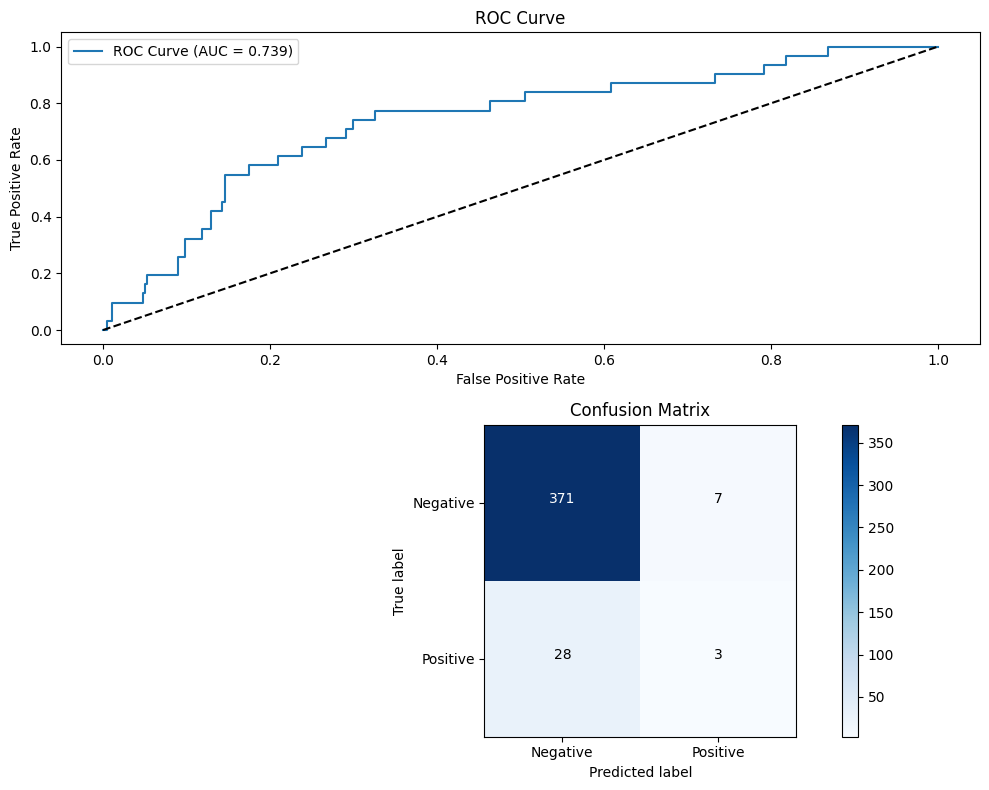

Test metrics saved to tabpfn_arf_edge_cases.json
Visualization saved to tabpfn_arf_edge_cases.png
Test metrics:
  roc_auc: 0.7387
  f1: 0.1463
  precision: 0.3000
  recall: 0.0968
  accuracy: 0.9144


In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, roc_curve
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json
from datetime import datetime
import pandas as pd
import sys
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Import synthcity components if not already imported
import synthcity.logger as log
from synthcity.plugins import Plugins
from synthcity.plugins.core.dataloader import GenericDataLoader

log.add(sink=sys.stderr, level="INFO")

# Apply StandardScaler to the training data
scaler = StandardScaler()

# Prepare training data with target for synthetic generation
train_df = X_train_folds.copy().reset_index(drop=True)
train_df['target'] = y_train_k_fold

# Create GenericDataLoader as per documentation
loader = GenericDataLoader(
    train_df,
    target_column="target",
)

# Generate synthetic data using synthcity's ARF
syn_model = Plugins().get("arf")
syn_model.fit(loader)

# Generate synthetic samples
synthetic_data = syn_model.generate(count=10000).dataframe()

# Extract minority class samples
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)

# Drop target column from synthetic data
syntetic_minority_features = minority_synthetic_data.drop('target', axis=1)
syntetic_target = minority_synthetic_data['target']

# Combine original and synthetic data
X_train_combined = pd.concat([X_train_folds, syntetic_minority_features])
X_train_scaled = scaler.fit_transform(X_train_combined)
y_train_combined = np.concatenate((y_train_k_fold, syntetic_target.values), axis=0)

# Apply the same transformation to test data
X_test_scaled = scaler.transform(X_test)

# Initialize and train final TabPFN classifier on the combined training data
final_classifier = AutoTabPFNClassifier(device='auto', max_time=60)
final_classifier.fit(X_train_scaled, y_train_combined)

# Save the final model
with open('AutoTabFPN_ARF_edge_cases.pkl', 'wb') as f:
    pickle.dump(final_classifier, f)

# Make predictions on test data
y_pred_prob = final_classifier.predict_proba(X_test_scaled)[:, 1]
y_pred = final_classifier.predict(X_test_scaled)

# Calculate metrics
metrics = {
    "roc_auc": float(roc_auc_score(y_test, y_pred_prob)),
    "f1": float(f1_score(y_test, y_pred)),
    "precision": float(precision_score(y_test, y_pred)),
    "recall": float(recall_score(y_test, y_pred)),
    "accuracy": float(accuracy_score(y_test, y_pred))
}

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Save results to JSON
result_filename = f'tabpfn_arf_edge_cases.json'

with open(result_filename, 'w') as f:
    json.dump(metrics, f, indent=4)

# Visualizations
plt.figure(figsize=(10, 8))

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.subplot(2, 1, 1)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {metrics["roc_auc"]:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Plot confusion matrix
plt.subplot(2, 1, 2)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])

# Add text annotations to confusion matrix
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Save the figure
plt.show()

# Print metrics summary
print(f"Test metrics saved to {result_filename}")
print(f"Visualization saved to tabpfn_arf_edge_cases.png")
print("Test metrics:")
for metric, value in metrics.items():
    print(f"  {metric}: {value:.4f}")

# NO cross-validation

In [ ]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
import numpy as np
import torch  # Required for saving the model
from tabpfn import TabPFNClassifier
import os
import pandas as pd

def objective(X_train, y_train, X_test, y_test):
    # Preprocess and generate synthetic data
    not_scaled_X_train = X_train.copy()
    train = not_scaled_X_train.copy().reset_index(drop=True)
    train['index'] = np.arange(1, len(train) + 1)
    train['target'] = y_train
    synthesizer = CopulaGANSynthesizer(metadata, epochs=500, default_distribution='norm')
    synthesizer.fit(train)
    synthetic_data = synthesizer.sample(num_rows=10000)
    minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
    if len(minority_synthetic_data) > 600:
      minority_synthetic_data = minority_synthetic_data.sample(n=600)
    syntetic_minority_dropped = minority_synthetic_data.copy().drop(['target', 'index'], axis=1)
    syntetic_target = minority_synthetic_data['target']

    # Combine real and synthetic data
    X_train_combined = pd.concat([not_scaled_X_train, syntetic_minority_dropped])
    X_train_combined = scaller.transform(X_train_combined)
    y_train_combined = np.concatenate((y_train, syntetic_target), axis=0)

    classifier = AutoTabPFNClassifier(device='auto', max_time=120)
    
    classifier.fit(X_train_combined, y_train_combined)
    
    y_pred_prob = classifier.predict_proba(X_test)[:, 1]
    y_pred = classifier.predict(X_test)
    
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    with open('scores_AutoTabFPN_syntetic_noCV_CopulaGAN.txt', 'w') as file:
        file.write(f"ROC AUC: {roc_auc}\n")
        file.write(f"F1: {f1}\n")
        file.write(f"Precision: {precision}\n")
        file.write(f"Recall: {recall}\n")
        file.write(f"Accuracy: {accuracy}\n")

    with open('AutoTabFPN_syntetic_noCV_CopulaGAN.pkl', 'wb') as f:
        pickle.dump(classifier, f)
    
    print("Model and evaluation metrics saved.")

    return {
        'roc_auc': roc_auc,
        'f1': f1,
        'precision': precision,
        'recall': recall,
        'accuracy': accuracy
    }

result = objective(X_train_folds, y_train_k_fold, X_test, y_test)

print("Results:", result)

# No CV and no Syntetic data

In [90]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
import numpy as np
import torch  # Required for saving the model
from tabpfn import TabPFNClassifier
import os
import pandas as pd

def objective(X_train, y_train, X_test, y_test):
    classifier = AutoTabPFNClassifier()
    
    classifier.fit(X_train, y_train)
    
    y_pred_prob = classifier.predict_proba(X_test)[:, 1]
    y_pred = classifier.predict(X_test)
    
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    with open('scores_AutoTabFPN_syntetic_noCV_noSyntetic.txt', 'w') as file:
        file.write(f"ROC AUC: {roc_auc}\n")
        file.write(f"F1: {f1}\n")
        file.write(f"Precision: {precision}\n")
        file.write(f"Recall: {recall}\n")
        file.write(f"Accuracy: {accuracy}\n")

    with open('AutoTabFPN_syntetic_noCV_noSyntetic.pkl', 'wb') as f:
        pickle.dump(classifier, f)
    
    print("Model and evaluation metrics saved.")

    return {
        'roc_auc': roc_auc,
        'f1': f1,
        'precision': precision,
        'recall': recall,
        'accuracy': accuracy
    }

result = objective(X_train_folds, y_train_k_fold, X_test, y_test)

print("Results:", result)

2025-03-09 13:00:18 INFO     Using `default` preset for Post Hoc Ensemble.
2025-03-09 13:00:18 INFO     No categorical_feature_indices given. Assuming no categorical features.
/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-03-09 13:00:18 INFO     Using task type: TaskType.BINARY
2025-03-09 13:00:18 INFO     Obtaining TabPFN models from a random portfolio.
2025-03-09 13:00:20 INFO     Using 100 base models: ['default_tabpfn_model_0', 'random_tabpfn_model_1', 'random_rf_pfn_model_2', 'random_rf_pfn_model_3', 'random_rf_pfn_model_4', 'random_rf_pfn_model_5', 'random_tabpfn_model_6', 'random_tabpfn_model_7', 'ran

Model and evaluation metrics saved.
Results: {'roc_auc': 0.6943918150814702, 'f1': 0.06060606060606061, 'precision': 0.25, 'recall': 0.034482758620689655, 'accuracy': 0.9211195928753181}


In [129]:
def generate_syntetic(X_train, y_train, num_rows=10000):
  not_scaled_X_train = X_train.copy()
  train = not_scaled_X_train.copy().reset_index(drop=True)
  train['index'] = np.arange(1, len(train) + 1)
  train['target'] = y_train
  synthesizer = CTGANSynthesizer(metadata, epochs=500)
  synthesizer.fit(train)
  synthetic_data = synthesizer.sample(num_rows)
  minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]

  # Enforce constraint
  if len(minority_synthetic_data) > 600:
      minority_synthetic_data = minority_synthetic_data.sample(n=600)

  syntetic_minority_dropped = minority_synthetic_data.copy().drop(['target', 'index'], axis=1)
  syntetic_target = minority_synthetic_data['target']
  return [syntetic_minority_dropped, syntetic_target, synthetic_data]

In [133]:
res = generate_syntetic(X_train_folds, y_train_k_fold)

2025-03-09 13:31:32 INFO     {'EVENT': 'Instance', 'TIMESTAMP': datetime.datetime(2025, 3, 9, 13, 31, 32, 916606), 'SYNTHESIZER CLASS NAME': 'CTGANSynthesizer', 'SYNTHESIZER ID': 'CTGANSynthesizer_1.17.4_4d51b1bc6acf44fba0a965b680ddad73'}
2025-03-09 13:31:32 INFO     {'EVENT': 'Fit', 'TIMESTAMP': datetime.datetime(2025, 3, 9, 13, 31, 32, 917156), 'SYNTHESIZER CLASS NAME': 'CTGANSynthesizer', 'SYNTHESIZER ID': 'CTGANSynthesizer_1.17.4_4d51b1bc6acf44fba0a965b680ddad73', 'TOTAL NUMBER OF TABLES': 1, 'TOTAL NUMBER OF ROWS': 1568, 'TOTAL NUMBER OF COLUMNS': 27}
2025-03-09 13:31:32 INFO     Fitting table  metadata
2025-03-09 13:31:32 INFO     Fitting formatters for table 
2025-03-09 13:31:32 INFO     No rounding scheme detected for column 'ef'. Data will not be rounded.
2025-03-09 13:31:32 INFO     No rounding scheme detected for column 'ckd'. Data will not be rounded.
2025-03-09 13:31:32 INFO     No rounding scheme detected for column 'stent_length'. Data will not be rounded.
2025-03-09 13:

In [134]:
unique, counts = np.unique(res[2]['target'], return_counts=True)
value_counts = dict(zip(unique, counts))
value_counts

{0: 9373, 1: 627}

In [135]:
unique, counts = np.unique(res[1], return_counts=True)
value_counts = dict(zip(unique, counts))
value_counts

{1: 600}

# TABPFN + GAN

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, roc_curve
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json
from datetime import datetime
import pandas as pd
import sys
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Import synthcity components if not already imported
import synthcity.logger as log
from synthcity.plugins import Plugins
from synthcity.plugins.core.dataloader import GenericDataLoader

log.add(sink=sys.stderr, level="INFO")

# Apply StandardScaler to the training data
scaler = StandardScaler()

# Prepare training data with target for synthetic generation
train_df = X_train_folds.copy().reset_index(drop=True)
train_df['target'] = y_train_k_fold

# Create GenericDataLoader as per documentation
loader = GenericDataLoader(
    train_df,
    target_column="target",
)

# Generate synthetic data using synthcity's ctgan
syn_model = Plugins().get("ctgan", n_iter=100, random_state=42)
syn_model.fit(loader)

# Generate synthetic samples
synthetic_data = syn_model.generate(count=10000).dataframe()

# Extract minority class samples
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)

# Drop target column from synthetic data
syntetic_minority_features = minority_synthetic_data.drop('target', axis=1)
syntetic_target = minority_synthetic_data['target']

# Combine original and synthetic data
X_train_combined = pd.concat([X_train_folds, syntetic_minority_features])
X_train_scaled = scaler.fit_transform(X_train_combined)
y_train_combined = np.concatenate((y_train_k_fold, syntetic_target.values), axis=0)

# Apply the same transformation to test data
X_test_scaled = scaler.transform(X_test)

# Initialize and train final TabPFN classifier on the combined training data
final_classifier = AutoTabPFNClassifier(device='auto', max_time=60)
final_classifier.fit(X_train_scaled, y_train_combined)

# Save the final model
with open('AutoTabFPN_ctgan.pkl', 'wb') as f:
    pickle.dump(final_classifier, f)

# Make predictions on test data
y_pred_prob = final_classifier.predict_proba(X_test_scaled)[:, 1]
y_pred = final_classifier.predict(X_test_scaled)

# Calculate metrics
metrics = {
    "roc_auc": float(roc_auc_score(y_test, y_pred_prob)),
    "f1": float(f1_score(y_test, y_pred)),
    "precision": float(precision_score(y_test, y_pred)),
    "recall": float(recall_score(y_test, y_pred)),
    "accuracy": float(accuracy_score(y_test, y_pred))
}

# Save results to JSON
result_filename = f'tabpfn_ctgan.json'

with open(result_filename, 'w') as f:
    json.dump(metrics, f, indent=4)

# Print metrics summary
print(f"Test metrics saved to {result_filename}")
print("Test metrics:")
for metric, value in metrics.items():
    print(f"  {metric}: {value:.4f}")

[KeOps] Warning : omp.h header is not in the path, disabling OpenMP. To fix this, you can set the environment
                  variable OMP_PATH to the location of the header before importing keopscore or pykeops,
                  e.g. using os.environ: import os; os.environ['OMP_PATH'] = '/path/to/omp/header'
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


2025-05-26 17:32:03 INFO     PyTorch version 2.2.2 available.
2025-05-26 17:32:03 INFO     Duckdb version 1.2.1 available.
2025-05-26 17:32:03 INFO     TensorFlow version 2.19.0 available.
[2025-05-26T17:32:03.318809+0400][21741][CRITICAL] load failed: Failed to import transformers.trainer because of the following error (look up to see its traceback):
Failed to import transformers.integrations.integration_utils because of the following error (look up to see its traceback):
Failed to import transformers.modeling_tf_utils because of the following error (look up to see its traceback):
Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.
[2025-05-26T17:32:03.318809+0400][21741][CRITICAL] load failed: Failed to import transformers.trainer because of the following error (look up to see its traceback):
Failed to import transformers.integrations.integration_util

Test metrics saved to tabpfn_ctgan.json
Test metrics:
  roc_auc: 0.6208
  f1: 0.0000
  precision: 0.0000
  recall: 0.0000
  accuracy: 0.8998


# TABPFN + ARF

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, roc_curve
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json
from datetime import datetime
import pandas as pd
import sys
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Import synthcity components if not already imported
import synthcity.logger as log
from synthcity.plugins import Plugins
from synthcity.plugins.core.dataloader import GenericDataLoader

log.add(sink=sys.stderr, level="INFO")

# Apply StandardScaler to the training data
scaler = StandardScaler()

# Prepare training data with target for synthetic generation
train_df = X_train_folds.copy().reset_index(drop=True)
train_df['target'] = y_train_k_fold

# Create GenericDataLoader as per documentation
loader = GenericDataLoader(
    train_df,
    target_column="target",
)

# Generate synthetic data using synthcity's ctgan
syn_model = Plugins().get("arf", random_state=42)
syn_model.fit(loader)

# Generate synthetic samples
synthetic_data = syn_model.generate(count=10000).dataframe()

# Extract minority class samples
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)

# Drop target column from synthetic data
syntetic_minority_features = minority_synthetic_data.drop('target', axis=1)
syntetic_target = minority_synthetic_data['target']

# Combine original and synthetic data
X_train_combined = pd.concat([X_train_folds, syntetic_minority_features])
X_train_scaled = scaler.fit_transform(X_train_combined)
y_train_combined = np.concatenate((y_train_k_fold, syntetic_target.values), axis=0)

# Apply the same transformation to test data
X_test_scaled = scaler.transform(X_test)

# Initialize and train final TabPFN classifier on the combined training data
final_classifier = AutoTabPFNClassifier(device='auto', max_time=60)
final_classifier.fit(X_train_scaled, y_train_combined)

# Save the final model
with open('AutoTabFPN_arf.pkl', 'wb') as f:
    pickle.dump(final_classifier, f)

# Make predictions on test data
y_pred_prob = final_classifier.predict_proba(X_test_scaled)[:, 1]
y_pred = final_classifier.predict(X_test_scaled)

# Calculate metrics
metrics = {
    "roc_auc": float(roc_auc_score(y_test, y_pred_prob)),
    "f1": float(f1_score(y_test, y_pred)),
    "precision": float(precision_score(y_test, y_pred)),
    "recall": float(recall_score(y_test, y_pred)),
    "accuracy": float(accuracy_score(y_test, y_pred))
}

# Save results to JSON
result_filename = f'tabpfn_arf.json'

with open(result_filename, 'w') as f:
    json.dump(metrics, f, indent=4)

# Print metrics summary
print(f"Test metrics saved to {result_filename}")
print("Test metrics:")
for metric, value in metrics.items():
    print(f"  {metric}: {value:.4f}")

[2025-05-26T17:39:53.382233+0400][21741][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-26T17:39:53.382233+0400][21741][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-26T17:39:53.383339+0400][21741][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-26T17:39:53.383339+0400][21741][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-26T17:39:53.384095+0400][21741][CRITICAL] module plugin_great load failed
[2025-05-26T17:39:53.384095+0400][21741][CRITICAL] module plugin_great load failed
[2025-05-26T17:39:53.385599+0400][21741][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/synthcity/plugins/generic/plugin_goggle.py
[2025-05-26T17:39:53.385599+0400][21741][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/s

Initial accuracy is 0.6107033639143731
Iteration number 1 reached accuracy of 0.42415902140672784.


[2025-05-26T17:40:03.944027+0400][21741][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9962. prev length 10000. Original dtype float64.
[2025-05-26T17:40:03.944727+0400][21741][INFO] [ef] quality loss for constraints ge = 17.0. Remaining 9939. prev length 9962. Original dtype float64.
[2025-05-26T17:40:03.946472+0400][21741][INFO] [age] quality loss for constraints le = 97.0. Remaining 9937. prev length 9939. Original dtype float64.
[2025-05-26T17:40:03.947087+0400][21741][INFO] [age] quality loss for constraints ge = 28.0. Remaining 9928. prev length 9937. Original dtype float64.
[2025-05-26T17:40:03.949126+0400][21741][INFO] [height] quality loss for constraints le = 196.0. Remaining 9874. prev length 9928. Original dtype float64.
[2025-05-26T17:40:03.949575+0400][21741][INFO] [height] quality loss for constraints ge = 65.0. Remaining 9869. prev length 9874. Original dtype float64.
[2025-05-26T17:40:03.952014+0400][21741][INFO] [previous_stroke_tia] quality loss for co

Test metrics saved to tabpfn_arf.json
Test metrics:
  roc_auc: 0.7467
  f1: 0.1304
  precision: 0.2000
  recall: 0.0968
  accuracy: 0.9022


# TABPFN + TVAE

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, roc_curve
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json
from datetime import datetime
import pandas as pd
import sys
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Import synthcity components if not already imported
import synthcity.logger as log
from synthcity.plugins import Plugins
from synthcity.plugins.core.dataloader import GenericDataLoader

log.add(sink=sys.stderr, level="INFO")

# Apply StandardScaler to the training data
scaler = StandardScaler()

# Prepare training data with target for synthetic generation
train_df = X_train_folds.copy().reset_index(drop=True)
train_df['target'] = y_train_k_fold

# Create GenericDataLoader as per documentation
loader = GenericDataLoader(
    train_df,
    target_column="target",
)

# Generate synthetic data using synthcity's ctgan
syn_model = Plugins().get("tvae", n_iter=100, random_state=42)
syn_model.fit(loader)

# Generate synthetic samples
synthetic_data = syn_model.generate(count=10000).dataframe()

# Extract minority class samples
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)

# Drop target column from synthetic data
syntetic_minority_features = minority_synthetic_data.drop('target', axis=1)
syntetic_target = minority_synthetic_data['target']

# Combine original and synthetic data
X_train_combined = pd.concat([X_train_folds, syntetic_minority_features])
X_train_scaled = scaler.fit_transform(X_train_combined)
y_train_combined = np.concatenate((y_train_k_fold, syntetic_target.values), axis=0)

# Apply the same transformation to test data
X_test_scaled = scaler.transform(X_test)

# Initialize and train final TabPFN classifier on the combined training data
final_classifier = AutoTabPFNClassifier(device='auto', max_time=60)
final_classifier.fit(X_train_scaled, y_train_combined)

# Save the final model
with open('AutoTabFPN_tvae.pkl', 'wb') as f:
    pickle.dump(final_classifier, f)

# Make predictions on test data
y_pred_prob = final_classifier.predict_proba(X_test_scaled)[:, 1]
y_pred = final_classifier.predict(X_test_scaled)

# Calculate metrics
metrics = {
    "roc_auc": float(roc_auc_score(y_test, y_pred_prob)),
    "f1": float(f1_score(y_test, y_pred)),
    "precision": float(precision_score(y_test, y_pred)),
    "recall": float(recall_score(y_test, y_pred)),
    "accuracy": float(accuracy_score(y_test, y_pred))
}

# Save results to JSON
result_filename = f'tabpfn_tvae.json'

with open(result_filename, 'w') as f:
    json.dump(metrics, f, indent=4)

# Print metrics summary
print(f"Test metrics saved to {result_filename}")
print("Test metrics:")
for metric, value in metrics.items():
    print(f"  {metric}: {value:.4f}")

[2025-05-26T17:45:17.068557+0400][21741][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-26T17:45:17.068557+0400][21741][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-26T17:45:17.068557+0400][21741][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-26T17:45:17.069845+0400][21741][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-26T17:45:17.069845+0400][21741][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-26T17:45:17.069845+0400][21741][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-26T17:45:17.070722+0400][21741][CRITICAL] module plugin_great load failed
[2025-05-26T17:45:17.070722+0400][21741][CRITICAL] module plugin_great load failed
[2025-

Test metrics saved to tabpfn_tvae.json
Test metrics:
  roc_auc: 0.5773
  f1: 0.0000
  precision: 0.0000
  recall: 0.0000
  accuracy: 0.8924


# TABPFN + GAUSSIAN COPULA

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, roc_curve
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json
from datetime import datetime
import pandas as pd
import sys
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Import synthcity components if not already imported
import synthcity.logger as log
from synthcity.plugins import Plugins
from synthcity.plugins.core.dataloader import GenericDataLoader

log.add(sink=sys.stderr, level="INFO")

# Apply StandardScaler to the training data
scaler = StandardScaler()

# Prepare training data with target for synthetic generation
if not isinstance(X_train_folds, pd.DataFrame):
    X_train_df = pd.DataFrame(X_train_folds)
else:
    X_train_df = X_train_folds.copy()

# Add target column to the training data
X_train_df['target'] = y_train_k_fold
X_train_df['index'] = np.arange(1, len(X_train_df) + 1)

# Generate synthetic data using Gaussian Copula
synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(X_train_df)
synthetic_data = synthesizer.sample(num_rows=10000)
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)

# Extract features and target from synthetic data
syntetic_minority_dropped = minority_synthetic_data.copy().drop(['target', 'index'], axis=1)
syntetic_target = minority_synthetic_data['target']

# Combine original and synthetic data
X_train_combined = pd.concat([X_train_df.drop(['target', 'index'], axis=1), syntetic_minority_dropped])
y_train_combined = np.concatenate((y_train_k_fold, syntetic_target), axis=0)

# Scale the combined training data
X_train_combined_scaled = scaler.fit_transform(X_train_combined)

final_classifier = AutoTabPFNClassifier(device='auto', max_time=60)
final_classifier.fit(X_train_combined_scaled, y_train_combined)

# Save the final model
with open('AutoTabFPN_gaussian_copula.pkl', 'wb') as f:
    pickle.dump(final_classifier, f)

# Make predictions on test data
y_pred_prob = final_classifier.predict_proba(X_test_scaled)[:, 1]
y_pred = final_classifier.predict(X_test_scaled)

# Calculate metrics
metrics = {
    "roc_auc": float(roc_auc_score(y_test, y_pred_prob)),
    "f1": float(f1_score(y_test, y_pred)),
    "precision": float(precision_score(y_test, y_pred)),
    "recall": float(recall_score(y_test, y_pred)),
    "accuracy": float(accuracy_score(y_test, y_pred))
}

# Save results to JSON
result_filename = f'tabpfn_gaussian_copula.json'

with open(result_filename, 'w') as f:
    json.dump(metrics, f, indent=4)

# Print metrics summary
print(f"Test metrics saved to {result_filename}")
print("Test metrics:")
for metric, value in metrics.items():
    print(f"  {metric}: {value:.4f}")

2025-05-26 17:52:47 INFO     {'EVENT': 'Instance', 'TIMESTAMP': datetime.datetime(2025, 5, 26, 17, 52, 47, 811771), 'SYNTHESIZER CLASS NAME': 'GaussianCopulaSynthesizer', 'SYNTHESIZER ID': 'GaussianCopulaSynthesizer_1.17.4_c31baf511d554a6bbf8aeb6b4eb567d5'}
2025-05-26 17:52:47 INFO     {'EVENT': 'Fit', 'TIMESTAMP': datetime.datetime(2025, 5, 26, 17, 52, 47, 814922), 'SYNTHESIZER CLASS NAME': 'GaussianCopulaSynthesizer', 'SYNTHESIZER ID': 'GaussianCopulaSynthesizer_1.17.4_c31baf511d554a6bbf8aeb6b4eb567d5', 'TOTAL NUMBER OF TABLES': 1, 'TOTAL NUMBER OF ROWS': 1635, 'TOTAL NUMBER OF COLUMNS': 24}
2025-05-26 17:52:47 INFO     Fitting table  metadata
2025-05-26 17:52:47 INFO     Fitting formatters for table 
2025-05-26 17:52:47 INFO     No rounding scheme detected for column 'ef'. Data will not be rounded.
2025-05-26 17:52:47 INFO     No rounding scheme detected for column 'previous_stroke_tia'. Data will not be rounded.
2025-05-26 17:52:47 INFO     Fitting constraints for table 
2025-05-26

Test metrics saved to tabpfn_gaussian_copula.json
Test metrics:
  roc_auc: 0.6814
  f1: 0.1974
  precision: 0.1240
  recall: 0.4839
  accuracy: 0.7017


# TABPFN + SMOTE

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, roc_curve
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json
from datetime import datetime
import pandas as pd
import sys
import warnings
from simplical_smote_kdd.ssmote import BorderlineSimplicialSMOTE, SimplicialSMOTE

# Suppress warnings
warnings.filterwarnings("ignore")

# Import synthcity components if not already imported
import synthcity.logger as log
from synthcity.plugins import Plugins
from synthcity.plugins.core.dataloader import GenericDataLoader

log.add(sink=sys.stderr, level="INFO")

# Convert DataFrame to NumPy array if needed
if isinstance(X_train_folds, pd.DataFrame):
    X_train_folds_np = X_train_folds.values
else:
    X_train_folds_np = X_train_folds

if isinstance(y_train_k_fold, pd.Series):
    y_train_k_fold_np = y_train_k_fold.values
else:
    y_train_k_fold_np = y_train_k_fold

# Now use the NumPy arrays with SimplicialSMOTE
X_res, y_res = SimplicialSMOTE(random_state=42).fit_resample(X_train_folds_np, y_train_k_fold_np)

# Apply StandardScaler to the training data
scaler = StandardScaler()

# Scale the combined training data
X_train_res_scaled = scaler.fit_transform(X_res)

final_classifier = AutoTabPFNClassifier(device='auto', max_time=60)
final_classifier.fit(X_train_res_scaled, y_res)

# Save the final model
with open('AutoTabFPN_simplicial_smote.pkl', 'wb') as f:
    pickle.dump(final_classifier, f)

# Make predictions on test data
y_pred_prob = final_classifier.predict_proba(X_test_scaled)[:, 1]
y_pred = final_classifier.predict(X_test_scaled)

# Calculate metrics
metrics = {
    "roc_auc": float(roc_auc_score(y_test, y_pred_prob)),
    "f1": float(f1_score(y_test, y_pred)),
    "precision": float(precision_score(y_test, y_pred)),
    "recall": float(recall_score(y_test, y_pred)),
    "accuracy": float(accuracy_score(y_test, y_pred))
}

# Save results to JSON
result_filename = f'tabpfn_simplicial_smote.json'

with open(result_filename, 'w') as f:
    json.dump(metrics, f, indent=4)

# Print metrics summary
print(f"Test metrics saved to {result_filename}")
print("Test metrics:")
for metric, value in metrics.items():
    print(f"  {metric}: {value:.4f}")

2025-05-26 18:03:25 INFO     Using `default` preset for Post Hoc Ensemble.
2025-05-26 18:03:25 INFO     No categorical_feature_indices given. Assuming no categorical features.
2025-05-26 18:03:25 INFO     Using task type: TaskType.BINARY
2025-05-26 18:03:25 INFO     Obtaining TabPFN models from a random portfolio.
2025-05-26 18:03:27 INFO     Using 100 base models: ['default_tabpfn_model_0', 'random_tabpfn_model_1', 'random_rf_pfn_model_2', 'random_rf_pfn_model_3', 'random_rf_pfn_model_4', 'random_rf_pfn_model_5', 'random_tabpfn_model_6', 'random_tabpfn_model_7', 'random_rf_pfn_model_8', 'random_tabpfn_model_9', 'random_rf_pfn_model_10', 'random_rf_pfn_model_11', 'random_tabpfn_model_12', 'random_tabpfn_model_13', 'random_rf_pfn_model_14', 'random_rf_pfn_model_15', 'random_rf_pfn_model_16', 'random_tabpfn_model_17', 'random_rf_pfn_model_18', 'random_tabpfn_model_19', 'random_rf_pfn_model_20', 'random_rf_pfn_model_21', 'random_tabpfn_model_22', 'random_rf_pfn_model_23', 'random_rf_pfn_m

Test metrics saved to tabpfn_simplicial_smote.json
Test metrics:
  roc_auc: 0.3892
  f1: 0.1409
  precision: 0.0758
  recall: 1.0000
  accuracy: 0.0758


# TabPFN + ARF + EDGE CASES

In [51]:
import importlib
import edge_case
importlib.reload(edge_case)
from edge_case import generate_edge_cases

edge_cases = generate_edge_cases(num_samples=150)
edge_cases

,age,height,clinical_presentation,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,medina_side,...,restenosis_reocclusion,adhoc_pci,main_predilatation,stent_diameter,stent_length,mortality,smoking,dyslipidemia,anemia,atrial_fibrilation
0,91.692608,154.098475,5,20.013035,1,1,1,0,1,1,...,1,0,1,2.251928,35.843477,1,1,1,1,1
1,98.047766,157.876507,4,23.191234,1,1,0,1,1,1,...,1,1,1,2.407627,32.689461,1,0,1,1,1
2,93.899237,162.817555,5,15.705469,1,1,1,1,1,1,...,1,1,0,2.131580,35.612648,1,0,1,1,1
3,96.611771,141.655335,5,20.042240,1,1,1,1,1,0,...,1,1,0,2.711981,29.622981,1,1,1,1,1
4,90.126266,169.752470,5,22.975668,1,0,0,1,1,1,...,1,0,0,2.669322,32.912135,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,87.137148,140.557859,5,27.248375,1,1,1,1,1,1,...,1,1,1,2.735354,29.382213,1,1,1,1,1
146,87.744911,161.799988,5,17.857095,1,1,1,1,1,0,...,1,1,1,2.202047,28.605845,1,1,1,1,1
147,86.262454,146.269984,4,19.876380,1,0,0,1,1,1,...,1,1,1,2.337757,37.134505,1,0,1,1,1
148,99.217685,140.040983,4,20.891875,1,1,1,0,1,1,...,1,1,0,2.171117,32.586449,1,1,1,1,1


In [52]:
edge_case_cols = set(edge_cases.columns)
x_train_cols = set(X_train.columns)

common_cols = edge_case_cols.intersection(x_train_cols)
only_in_edge_cases = edge_case_cols - x_train_cols
only_in_x_train = x_train_cols - edge_case_cols

print(f"COMPARISON OF COLUMNS:")
print(f"\nTotal columns in edge_cases: {len(edge_case_cols)}")
print(f"Total columns in X_train: {len(x_train_cols)}")
print(f"Number of common columns: {len(common_cols)}")

print("\n--- COMMON COLUMNS ---")
for col in sorted(common_cols):
    print(f"- {col}")

print("\n--- COLUMNS ONLY IN EDGE CASES ---")
for col in sorted(only_in_edge_cases):
    print(f"- {col}")

print("\n--- COLUMNS ONLY IN X_TRAIN ---")
for col in sorted(only_in_x_train):
    print(f"- {col}")

COMPARISON OF COLUMNS:

Total columns in edge_cases: 30
Total columns in X_train: 22
Number of common columns: 22

--- COMMON COLUMNS ---
- age
- anemia
- atrial_fibrilation
- calcium
- cerebrovascular_disease
- clinical_presentation
- cto_bifurc
- def
- dyslipidemia
- ef
- height
- history_of_cancer
- if_yes_what_type___1
- medina_side
- peripheral_artery_disease
- previous_pci
- previous_stroke_tia
- side_diametr
- single_vessel
- smoking
- stent_type___3
- trifurcation

--- COLUMNS ONLY IN EDGE CASES ---
- adhoc_pci
- main_predilatation
- mortality
- restenosis_reocclusion
- stent_diameter
- stent_length
- stent_type___4
- stent_type___5

--- COLUMNS ONLY IN X_TRAIN ---


In [53]:
edge_cases_target = edge_cases['mortality']
edge_cases_features = edge_cases.copy().drop('mortality', axis=1)

In [54]:
edge_cases_features_names = [feature for feature in edge_cases.columns if feature in X_train.columns]
edge_cases_features = pd.DataFrame(edge_cases, columns=edge_cases_features_names)
edge_cases_features

,age,height,clinical_presentation,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,medina_side,...,def,history_of_cancer,previous_pci,previous_stroke_tia,side_diametr,stent_type___3,smoking,dyslipidemia,anemia,atrial_fibrilation
0,91.692608,154.098475,5,20.013035,1,1,1,0,1,1,...,1,1,1,1,1.686656,1,1,1,1,1
1,98.047766,157.876507,4,23.191234,1,1,0,1,1,1,...,1,1,0,0,1.958402,1,0,1,1,1
2,93.899237,162.817555,5,15.705469,1,1,1,1,1,1,...,1,1,1,1,1.255181,0,0,1,1,1
3,96.611771,141.655335,5,20.042240,1,1,1,1,1,0,...,1,1,1,1,1.781142,0,1,1,1,1
4,90.126266,169.752470,5,22.975668,1,0,0,1,1,1,...,1,1,1,1,1.717308,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,87.137148,140.557859,5,27.248375,1,1,1,1,1,1,...,1,0,1,0,1.265116,1,1,1,1,1
146,87.744911,161.799988,5,17.857095,1,1,1,1,1,0,...,1,1,1,1,1.867154,0,1,1,1,1
147,86.262454,146.269984,4,19.876380,1,0,0,1,1,1,...,0,1,0,0,1.694251,1,0,1,1,1
148,99.217685,140.040983,4,20.891875,1,1,1,0,1,1,...,0,1,1,0,1.740156,0,1,1,1,1


In [55]:
X_train_folds = pd.concat([X_train, X_val, edge_cases_features])
y_train_k_fold = np.concatenate((y_train, y_val, edge_cases_target), axis=0)

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, roc_curve
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json
from datetime import datetime
import pandas as pd
import sys
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Import synthcity components if not already imported
import synthcity.logger as log
from synthcity.plugins import Plugins
from synthcity.plugins.core.dataloader import GenericDataLoader

log.add(sink=sys.stderr, level="INFO")

# Apply StandardScaler to the training data
scaler = StandardScaler()

# Prepare training data with target for synthetic generation
train_df = X_train_folds.copy().reset_index(drop=True)
train_df['target'] = y_train_k_fold

# Create GenericDataLoader as per documentation
loader = GenericDataLoader(
    train_df,
    target_column="target",
)

# Generate synthetic data using synthcity's ctgan
syn_model = Plugins().get("arf", random_state=42)
syn_model.fit(loader)

# Generate synthetic samples
synthetic_data = syn_model.generate(count=10000).dataframe()

# Extract minority class samples
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)

# Drop target column from synthetic data
syntetic_minority_features = minority_synthetic_data.drop('target', axis=1)
syntetic_target = minority_synthetic_data['target']

# Combine original and synthetic data
X_train_combined = pd.concat([X_train_folds, syntetic_minority_features])
X_train_scaled = scaler.fit_transform(X_train_combined)
y_train_combined = np.concatenate((y_train_k_fold, syntetic_target.values), axis=0)

# Apply the same transformation to test data
X_test_scaled = scaler.transform(X_test)

# Initialize and train final TabPFN classifier on the combined training data
final_classifier = AutoTabPFNClassifier(device='auto', max_time=60)
final_classifier.fit(X_train_scaled, y_train_combined)

# Save the final model
with open('AutoTabFPN_arf_edge_cases.pkl', 'wb') as f:
    pickle.dump(final_classifier, f)

# Make predictions on test data
y_pred_prob = final_classifier.predict_proba(X_test_scaled)[:, 1]
y_pred = final_classifier.predict(X_test_scaled)

# Calculate metrics
metrics = {
    "roc_auc": float(roc_auc_score(y_test, y_pred_prob)),
    "f1": float(f1_score(y_test, y_pred)),
    "precision": float(precision_score(y_test, y_pred)),
    "recall": float(recall_score(y_test, y_pred)),
    "accuracy": float(accuracy_score(y_test, y_pred))
}

# Save results to JSON
result_filename = f'tabpfn_arf_edge_cases.json'

with open(result_filename, 'w') as f:
    json.dump(metrics, f, indent=4)

# Print metrics summary
print(f"Test metrics saved to {result_filename}")
print("Test metrics:")
for metric, value in metrics.items():
    print(f"  {metric}: {value:.4f}")

[KeOps] Warning : omp.h header is not in the path, disabling OpenMP. To fix this, you can set the environment
                  variable OMP_PATH to the location of the header before importing keopscore or pykeops,
                  e.g. using os.environ: import os; os.environ['OMP_PATH'] = '/path/to/omp/header'
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


2025-05-27 18:34:15 INFO     PyTorch version 2.2.2 available.
2025-05-27 18:34:15 INFO     Duckdb version 1.2.1 available.
2025-05-27 18:34:15 INFO     TensorFlow version 2.19.0 available.
[2025-05-27T18:34:15.710703+0400][58577][CRITICAL] load failed: Failed to import transformers.trainer because of the following error (look up to see its traceback):
Failed to import transformers.integrations.integration_utils because of the following error (look up to see its traceback):
Failed to import transformers.modeling_tf_utils because of the following error (look up to see its traceback):
Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.
[2025-05-27T18:34:15.710703+0400][58577][CRITICAL] load failed: Failed to import transformers.trainer because of the following error (look up to see its traceback):
Failed to import transformers.integrations.integration_util

Initial accuracy is 0.7448179271708684
Iteration number 1 reached accuracy of 0.42661064425770306.


2025-05-27 18:34:33 INFO     Using `default` preset for Post Hoc Ensemble.
2025-05-27 18:34:33 INFO     No categorical_feature_indices given. Assuming no categorical features.
2025-05-27 18:34:33 INFO     Using task type: TaskType.BINARY
2025-05-27 18:34:33 INFO     Obtaining TabPFN models from a random portfolio.
2025-05-27 18:34:35 INFO     Using 100 base models: ['default_tabpfn_model_0', 'random_tabpfn_model_1', 'random_rf_pfn_model_2', 'random_rf_pfn_model_3', 'random_rf_pfn_model_4', 'random_rf_pfn_model_5', 'random_tabpfn_model_6', 'random_tabpfn_model_7', 'random_rf_pfn_model_8', 'random_tabpfn_model_9', 'random_rf_pfn_model_10', 'random_rf_pfn_model_11', 'random_tabpfn_model_12', 'random_tabpfn_model_13', 'random_rf_pfn_model_14', 'random_rf_pfn_model_15', 'random_rf_pfn_model_16', 'random_tabpfn_model_17', 'random_rf_pfn_model_18', 'random_tabpfn_model_19', 'random_rf_pfn_model_20', 'random_rf_pfn_model_21', 'random_tabpfn_model_22', 'random_rf_pfn_model_23', 'random_rf_pfn_m

KeyboardInterrupt: 